# Credit EDA 

#### *Problem Statement:*
*Understand how the bank approves and refuses loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.*

#### *Business Objectives:*
*This example study pursuits to identify patterns which suggest if a customer has problem paying their instalments which can be used for taking actions together with denying the loan, lowering the amount of loan, lending (to risky customers) at a higher interest rate, etc. This may make certain that the customers capable of repaying the loan are not rejected. Identity of such customers using EDA is the goal of this case study.
In other words, the company wants to recognize the driving factors (or driver variables) behind loan default, i.e. the variables that are strong indicators of default. The organization can utilise this understanding for its portfolio and risk assessment.*

## *1. Importing Libraries.*
*Importing Libraries which we think are important for the analysis and visualization of the Credit EDA casestudy.*

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('classic')
sns.set()

# setting up pandas to view large files
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## *2. Loading the Data.*

In [2]:
# importing csv file 'application_data.csv' as new_appl.
new_appl = pd.read_csv('application_data.csv')
new_appl.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [3]:
# importing csv file 'previous_application.csv' as prev_appl.
prev_appl = pd.read_csv('previous_application.csv')
prev_appl.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

#### *2.1 Inspecting the Dataframes.*

In [4]:
# checking the dimensions of the Dataframes 'new_appl' and 'prev_appl'.
print('Dimension of new_appl  :' , new_appl.shape)
print('Dimension of prev_appl :' , prev_appl.shape)

Dimension of new_appl  : (307511, 122)
Dimension of prev_appl : (1670214, 37)


In [5]:
# Check the summary for the numeric columns.
new_appl.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
# Check the dtypes of the columns.
new_appl.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#### *2.2 Data Cleaning.*

In [7]:
# Percentage of null values present in each columns.
round(new_appl.isnull().sum() * 100 / len(new_appl) , 4).sort_values(ascending = False)

COMMONAREA_MEDI                 69.8723
COMMONAREA_AVG                  69.8723
COMMONAREA_MODE                 69.8723
NONLIVINGAPARTMENTS_MODE        69.4330
NONLIVINGAPARTMENTS_MEDI        69.4330
NONLIVINGAPARTMENTS_AVG         69.4330
FONDKAPREMONT_MODE              68.3862
LIVINGAPARTMENTS_MEDI           68.3550
LIVINGAPARTMENTS_MODE           68.3550
LIVINGAPARTMENTS_AVG            68.3550
FLOORSMIN_MEDI                  67.8486
FLOORSMIN_MODE                  67.8486
FLOORSMIN_AVG                   67.8486
YEARS_BUILD_MEDI                66.4978
YEARS_BUILD_AVG                 66.4978
YEARS_BUILD_MODE                66.4978
OWN_CAR_AGE                     65.9908
LANDAREA_MODE                   59.3767
LANDAREA_AVG                    59.3767
LANDAREA_MEDI                   59.3767
BASEMENTAREA_MEDI               58.5160
BASEMENTAREA_AVG                58.5160
BASEMENTAREA_MODE               58.5160
EXT_SOURCE_1                    56.3811
NONLIVINGAREA_MEDI              55.1792


##### 2.2.1 Dropping Columns have more than 35% Null values.
* Reason for using 35% threshold is to keep the column 'OCCUPATION_TYPE' for the analysis.
* OCCUPATION_TYPE may provide us useful insights in our analysis, despite having large null values.
* Other columns which are beyond the threshold of 35% have way too many null values present.So we will be cleaning these columns before moving further in our analysis.

In [8]:
# Number of columns have percentage of null values >= 35%.
len(new_appl.columns[new_appl.isnull().mean() >= 0.35])

49

In [9]:
# Dropping the columns having percentage of null values >= 35%. And checking the Dimensions of original('new_appl') and treated data('new_appl01')
new_appl01 = new_appl.drop(new_appl.columns[new_appl.isnull().mean() >= 0.35], axis = 1)

print('Original data:' , new_appl.shape)
print('Treated data :' , new_appl01.shape)

Original data: (307511, 122)
Treated data : (307511, 73)


In [10]:
# Checking the percentage of the null values in each of the columns.
round(new_appl01.isnull().sum() * 100 / len(new_appl01) , 4).sort_values(ascending = False)

OCCUPATION_TYPE                31.3455
EXT_SOURCE_3                   19.8253
AMT_REQ_CREDIT_BUREAU_YEAR     13.5016
AMT_REQ_CREDIT_BUREAU_MON      13.5016
AMT_REQ_CREDIT_BUREAU_WEEK     13.5016
AMT_REQ_CREDIT_BUREAU_DAY      13.5016
AMT_REQ_CREDIT_BUREAU_HOUR     13.5016
AMT_REQ_CREDIT_BUREAU_QRT      13.5016
NAME_TYPE_SUITE                 0.4201
OBS_30_CNT_SOCIAL_CIRCLE        0.3320
DEF_30_CNT_SOCIAL_CIRCLE        0.3320
OBS_60_CNT_SOCIAL_CIRCLE        0.3320
DEF_60_CNT_SOCIAL_CIRCLE        0.3320
EXT_SOURCE_2                    0.2146
AMT_GOODS_PRICE                 0.0904
AMT_ANNUITY                     0.0039
CNT_FAM_MEMBERS                 0.0007
DAYS_LAST_PHONE_CHANGE          0.0003
NAME_INCOME_TYPE                0.0000
FLAG_OWN_REALTY                 0.0000
TARGET                          0.0000
FLAG_EMAIL                      0.0000
FLAG_PHONE                      0.0000
FLAG_CONT_MOBILE                0.0000
NAME_CONTRACT_TYPE              0.0000
FLAG_WORK_PHONE          

In [11]:
new_appl01.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

##### *2.2.2 Removing the Columns not useful for the Analysis.*
* We will be removing the columns which we think might not be necessary for the analysis and vissualization, hence reducing the dimensions of the data.

In [12]:
# Dropping few more columns.
drop_list = ['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
             'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 
             'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

new_appl01 = new_appl01.drop(drop_list , axis = 1)
print('Dimension of new_appl01: ' , new_appl01.shape)

Dimension of new_appl01:  (307511, 36)


In [13]:
# Checking the summary for any irregularities present in the dataframe 'new_appl01'
new_appl01.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
count      307511.000000    307511.000000    307509.000000  3.068510e+05   
mean        -4986.120328     -2994.202373         2.152665  5.143927e-01   
std          3522.886321      1509.450419         0.910682  1.910602e-01   
min        -24672.000000     -7197.000000         1.000000  8.173617e-08   
25%         -7479.500000     -4299.000000         2.000000  3.924574e-01   
50%         -4504.000000     -3254.000000         2.000000  5.659614e-01   
75%         -2010.000000     -1720.000000         3.000000  6.636171e-01   
max             0.000000         0.000000        20.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count  246546.000000             306490.000000             306490.000000   
mean        0.510853                  1.422245                  0.143421   
std         0.194844                  2.400989                  0.446698   
min         0.000527                  0.000000                  0.000000   
25%         0.370650                  0.000000                  0.000000   
50%         0.535276                  0.000000                  0.000000   
75%         0.669057                  2.000000                  0.000000   
max         0.896010                348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000               265992.000000   
mean              -962.858788                    0.006402   
std                826.808487                    0.083849   
min              -4292.000000                    0.000000   
25%              -1570.000000       

##### *2.2.3 Converting Negative values to Positive*
As we can see from the above summary there are quite a number of columns having negative values present. We will be using the abs()[absolute function] to convert it to positives so we can use it for our analysis.

In [14]:
# Printing the unique values of the columns with negative values.
print(new_appl01['DAYS_BIRTH'].unique())
print(new_appl01['DAYS_EMPLOYED'].unique())
print(new_appl01['DAYS_REGISTRATION'].unique())
print(new_appl01['DAYS_ID_PUBLISH'].unique())
print(new_appl01['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [15]:
eror_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
new_appl01[eror_col] = abs(new_appl[eror_col])
new_appl01.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
count      307511.000000    307511.000000    307509.000000  3.068510e+05   
mean         4986.120328      2994.202373         2.152665  5.143927e-01   
std          3522.886321      1509.450419         0.910682  1.910602e-01   
min             0.000000         0.000000         1.000000  8.173617e-08   
25%          2010.000000      1720.000000         2.000000  3.924574e-01   
50%          4504.000000      3254.000000         2.000000  5.659614e-01   
75%          7479.500000      4299.000000         3.000000  6.636171e-01   
max         24672.000000      7197.000000        20.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count  246546.000000             306490.000000             306490.000000   
mean        0.510853                  1.422245                  0.143421   
std         0.194844                  2.400989                  0.446698   
min         0.000527                  0.000000                  0.000000   
25%         0.370650                  0.000000                  0.000000   
50%         0.535276                  0.000000                  0.000000   
75%         0.669057                  2.000000                  0.000000   
max         0.896010                348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000               265992.000000   
mean               962.858788                    0.006402   
std                826.808487                    0.083849   
min                  0.000000                    0.000000   
25%                274.000000       

##### *2.2.4 Dealing with the XNA values present.*

In [16]:
new_appl01.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
new_appl01.CODE_GENDER.mode()

0    F
dtype: object

In [18]:
# Replacing the XNA with 'F'.
new_appl01.loc[new_appl01.CODE_GENDER == 'XNA' , 'CODE_GENDER'] = 'F'
new_appl01.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
new_appl01.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [20]:
new_appl01.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [21]:
55374 * 100 / 307511

18.00716071945394

In [22]:
# Dropping the XNA values, which is around 18% of the whole column, so even if we are droppin them it won't have a major impact on our analysis.
new_appl01 = new_appl01.drop(new_appl01.loc[new_appl01['ORGANIZATION_TYPE']=='XNA'].index)
new_appl01.ORGANIZATION_TYPE.describe()

count                     252137
unique                        57
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

#### *2.3 Best Metric to Impute in the Missing values in the columns.*

In [23]:
round(new_appl01.isnull().sum() * 100 / len(new_appl01) , 4).sort_values(ascending = False)

EXT_SOURCE_3                  19.7892
OCCUPATION_TYPE               16.2685
AMT_REQ_CREDIT_BUREAU_YEAR    13.4276
AMT_REQ_CREDIT_BUREAU_MON     13.4276
AMT_REQ_CREDIT_BUREAU_WEEK    13.4276
AMT_REQ_CREDIT_BUREAU_DAY     13.4276
AMT_REQ_CREDIT_BUREAU_HOUR    13.4276
AMT_REQ_CREDIT_BUREAU_QRT     13.4276
DEF_60_CNT_SOCIAL_CIRCLE       0.3367
OBS_60_CNT_SOCIAL_CIRCLE       0.3367
DEF_30_CNT_SOCIAL_CIRCLE       0.3367
OBS_30_CNT_SOCIAL_CIRCLE       0.3367
EXT_SOURCE_2                   0.1999
AMT_GOODS_PRICE                0.1015
AMT_ANNUITY                    0.0048
CNT_FAM_MEMBERS                0.0008
DAYS_LAST_PHONE_CHANGE         0.0004
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
DAYS_EMPLOYED                  0.0000
NAME_INCOME_

##### *2.3.1 Imputing missing values in Continuous Variables.*

In [24]:
AMT_col = ['AMT_GOODS_PRICE', 'EXT_SOURCE_2' , 'EXT_SOURCE_3', 'AMT_ANNUITY']
round(new_appl01[['AMT_GOODS_PRICE', 'EXT_SOURCE_2' , 'EXT_SOURCE_3', 'AMT_ANNUITY']].describe(), 4)

AMT_GOODS_PRICE  EXT_SOURCE_2  EXT_SOURCE_3  AMT_ANNUITY
count     2.518810e+05   251633.0000   202241.0000  252125.0000
mean      5.494057e+05        0.5161        0.5003   27812.3252
std       3.732685e+05        0.1899        0.1960   14647.7591
min       4.050000e+04        0.0000        0.0005    1980.0000
25%       2.475000e+05        0.3983        0.3573   17073.0000
50%       4.500000e+05        0.5671        0.5227   25834.5000
75%       6.930000e+05        0.6639        0.6578   35617.5000
max       4.050000e+06        0.8550        0.8940  258025.5000

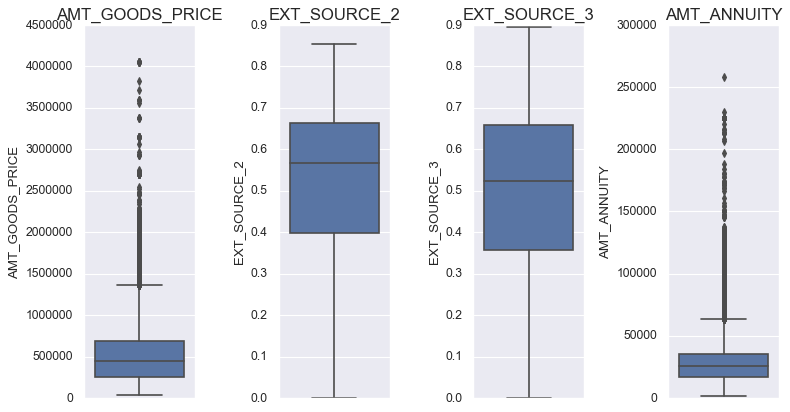

In [25]:
plt.figure(figsize = [10,20])
for i in enumerate(AMT_col):
    plt.subplot(4, 4, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = new_appl01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()    
plt.show()

**Choosing the best metric:**
* As we observe from the above graph 'EXT_SOURCE_2' and 'EXT_SOURCE_3' don't have any outliers in there distribution, so we will be using the mean values of these columns to impute in place of missing values.
* On the other hand 'AMT_GOODS_PRICE' and 'AMT_ANNUITY' have outliers preent in there distribution, so we will be using the median values of these columns to impute in place of missing values.

In [26]:
new_appl01.AMT_GOODS_PRICE = new_appl01.AMT_GOODS_PRICE.fillna(new_appl01.AMT_GOODS_PRICE.median())
new_appl01.EXT_SOURCE_2 = new_appl01.EXT_SOURCE_2.fillna(new_appl01.EXT_SOURCE_2.mean())
new_appl01.EXT_SOURCE_3 = new_appl01.EXT_SOURCE_3.fillna(new_appl01.EXT_SOURCE_3.mean())
new_appl01.AMT_ANNUITY = new_appl01.AMT_ANNUITY.fillna(new_appl01.AMT_ANNUITY.median())

print('new_appl01.AMT_GOODS_PRICE :' , new_appl01.AMT_GOODS_PRICE.isnull().sum())
print('new_appl01.EXT_SOURCE_2    :' , new_appl01.EXT_SOURCE_2.isnull().sum())
print('new_appl01.EXT_SOURCE_3    :' , new_appl01.EXT_SOURCE_3.isnull().sum())
print('new_appl01.AMT_ANNUITY     :' , new_appl01.AMT_ANNUITY.isnull().sum())

new_appl01.AMT_GOODS_PRICE : 0
new_appl01.EXT_SOURCE_2    : 0
new_appl01.EXT_SOURCE_3    : 0
new_appl01.AMT_ANNUITY     : 0


In [27]:
amt_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' , 'AMT_REQ_CREDIT_BUREAU_YEAR' , 'AMT_REQ_CREDIT_BUREAU_DAY' ,
                 'AMT_REQ_CREDIT_BUREAU_WEEK' , 'AMT_REQ_CREDIT_BUREAU_MON']

round(new_appl01[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' , 'AMT_REQ_CREDIT_BUREAU_YEAR' , 'AMT_REQ_CREDIT_BUREAU_DAY' ,
                 'AMT_REQ_CREDIT_BUREAU_WEEK' , 'AMT_REQ_CREDIT_BUREAU_MON']].describe(), 4)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  \
count                 218281.0000                218281.0000   
mean                       0.0066                     0.2598   
std                        0.0851                     0.8237   
min                        0.0000                     0.0000   
25%                        0.0000                     0.0000   
50%                        0.0000                     0.0000   
75%                        0.0000                     0.0000   
max                        4.0000                   261.0000   

       AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                 218281.0000                 218281.000   
mean                       1.8563                      0.007   
std                        1.8263                      0.111   
min                        0.0000                      0.000   
25%                        0.0000                      0.000   
50%                        1.0000                      0.000   
75%                        3.0000                      0.000   
max                       23.0000                      9.000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  
count                 218281.0000                218281.0000  
mean                       0.0341                     0.2820  
std                        0.2028                     0.9484  
min                        0.0000                     0.0000  
25%                        0.0000                     0.0000  
50%                        0.0000                     0.0000  
75%                        0.0000                     0.0000  
max                        8.0000                    27.0000

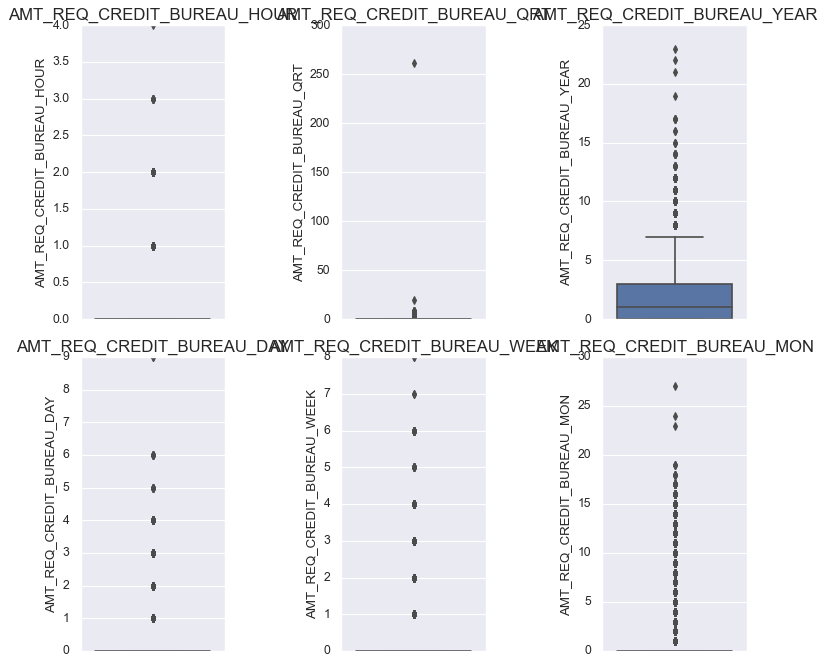

In [28]:
plt.figure(figsize = [10,25])
for i in enumerate(amt_col):
    plt.subplot(6, 3, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = new_appl01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()    
plt.show()

**Choosing the best metric:**
* As we observe from the above graph AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'and 'AMT_REQ_CREDIT_BUREAU_MON' have outliers in there distribution, so we will be using the median values of these columns to impute in place of missing values.

In [29]:
new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR = new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR.median())
new_appl01.AMT_REQ_CREDIT_BUREAU_QRT = new_appl01.AMT_REQ_CREDIT_BUREAU_QRT.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_QRT.median())
new_appl01.AMT_REQ_CREDIT_BUREAU_YEAR = new_appl01.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_YEAR.median())
new_appl01.AMT_REQ_CREDIT_BUREAU_DAY = new_appl01.AMT_REQ_CREDIT_BUREAU_DAY.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_DAY.median())
new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK = new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK.median())
new_appl01.AMT_REQ_CREDIT_BUREAU_MON = new_appl01.AMT_REQ_CREDIT_BUREAU_MON.fillna(new_appl01.AMT_REQ_CREDIT_BUREAU_MON.median())

print('new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR :' , new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print('new_appl01.AMT_REQ_CREDIT_BUREAU_QRT  :' , new_appl01.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print('new_appl01.AMT_REQ_CREDIT_BUREAU_YEAR :' , new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print('new_appl01.AMT_REQ_CREDIT_BUREAU_DAY  :' , new_appl01.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print('new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK :' , new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print('new_appl01.AMT_REQ_CREDIT_BUREAU_MON  :' , new_appl01.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())

new_appl01.AMT_REQ_CREDIT_BUREAU_HOUR : 0
new_appl01.AMT_REQ_CREDIT_BUREAU_QRT  : 0
new_appl01.AMT_REQ_CREDIT_BUREAU_YEAR : 0
new_appl01.AMT_REQ_CREDIT_BUREAU_DAY  : 0
new_appl01.AMT_REQ_CREDIT_BUREAU_WEEK : 0
new_appl01.AMT_REQ_CREDIT_BUREAU_MON  : 0


In [30]:
col = ['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']

round(new_appl01[['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']].describe(), 4)

DAYS_LAST_PHONE_CHANGE  CNT_FAM_MEMBERS
count             252136.0000      252135.0000
mean                 971.0386           2.2525
std                  827.3053           0.9421
min                    0.0000           1.0000
25%                  288.0000           2.0000
50%                  763.0000           2.0000
75%                 1578.0000           3.0000
max                 4292.0000          20.0000

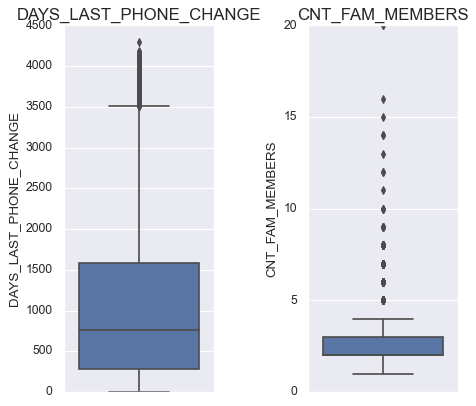

In [31]:
plt.figure(figsize = [6,10])
for i in enumerate(col):
    plt.subplot(2, 2, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = new_appl01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()
plt.show()

**Choosing the best metric:**
* As we observe from the above graph 'DAYS_LAST_PHONE_CHANGE' and 'CNT_FAM_MEMBERS' have outliers in there distribution, so we will be using the median values of these columns to impute in place of missing values.

In [32]:
new_appl01.DAYS_LAST_PHONE_CHANGE = new_appl01.DAYS_LAST_PHONE_CHANGE.fillna(new_appl01.DAYS_LAST_PHONE_CHANGE.median())
new_appl01.CNT_FAM_MEMBERS = new_appl01.CNT_FAM_MEMBERS.fillna(new_appl01.CNT_FAM_MEMBERS.median())

print('new_appl01.DAYS_LAST_PHONE_CHANGE:' , new_appl01.DAYS_LAST_PHONE_CHANGE.isnull().sum())
print('new_appl01.CNT_FAM_MEMBERS       :' , new_appl01.CNT_FAM_MEMBERS.isnull().sum())

new_appl01.DAYS_LAST_PHONE_CHANGE: 0
new_appl01.CNT_FAM_MEMBERS       : 0


In [33]:
social_col = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

round(new_appl01[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe(), 4)

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count               251288.0000               251288.0000   
mean                     1.4158                    0.1399   
std                      2.4000                    0.4419   
min                      0.0000                    0.0000   
25%                      0.0000                    0.0000   
50%                      0.0000                    0.0000   
75%                      2.0000                    0.0000   
max                    348.0000                   34.0000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count               251288.0000               251288.0000  
mean                     1.3987                    0.0977  
std                      2.3785                    0.3581  
min                      0.0000                    0.0000  
25%                      0.0000                    0.0000  
50%                      0.0000                    0.0000  
75%                      2.0000                    0.0000  
max                    344.0000                   24.0000

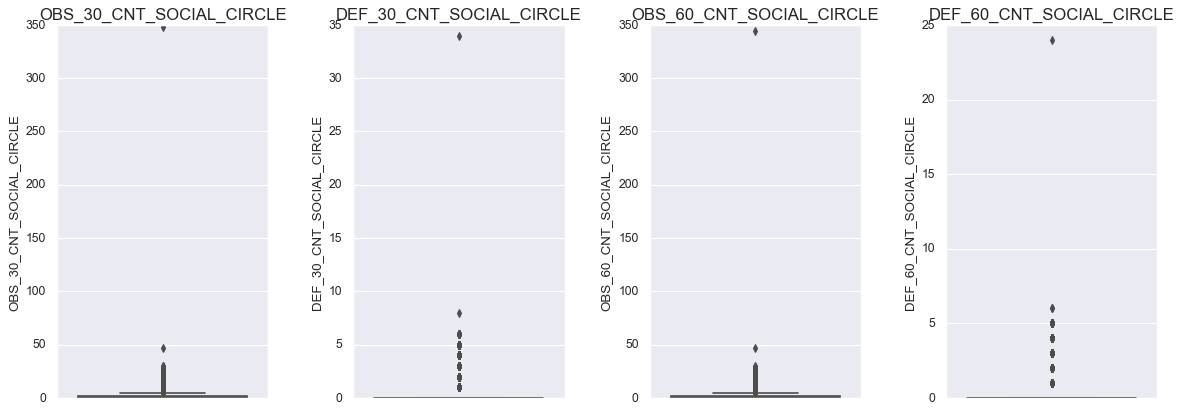

In [34]:
plt.figure(figsize = [15,20])
for i in enumerate(social_col):
    plt.subplot(4, 4, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = new_appl01, orient = 'v')
    plt.title(i[1], fontsize = 15)
plt.tight_layout()
plt.show()

**Choosing the best metric:**
* As we observe from the above graph 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE' have outliers in there distribution, so we will be using the median values of these columns to impute in place of missing values.

In [35]:
new_appl01.DEF_60_CNT_SOCIAL_CIRCLE = new_appl01.DEF_60_CNT_SOCIAL_CIRCLE.fillna(new_appl01.DEF_60_CNT_SOCIAL_CIRCLE.median())
new_appl01.OBS_60_CNT_SOCIAL_CIRCLE = new_appl01.OBS_60_CNT_SOCIAL_CIRCLE.fillna(new_appl01.OBS_60_CNT_SOCIAL_CIRCLE.median())
new_appl01.DEF_30_CNT_SOCIAL_CIRCLE = new_appl01.DEF_30_CNT_SOCIAL_CIRCLE.fillna(new_appl01.DEF_30_CNT_SOCIAL_CIRCLE.median())
new_appl01.OBS_30_CNT_SOCIAL_CIRCLE = new_appl01.OBS_30_CNT_SOCIAL_CIRCLE.fillna(new_appl01.OBS_30_CNT_SOCIAL_CIRCLE.median())

print('new_appl01.DEF_60_CNT_SOCIAL_CIRCLE :' , new_appl01.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum())
print('new_appl01.OBS_60_CNT_SOCIAL_CIRCLE :' , new_appl01.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum())
print('new_appl01.DEF_30_CNT_SOCIAL_CIRCLE :' , new_appl01.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum())
print('new_appl01.OBS_30_CNT_SOCIAL_CIRCLE :' , new_appl01.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum())

new_appl01.DEF_60_CNT_SOCIAL_CIRCLE : 0
new_appl01.OBS_60_CNT_SOCIAL_CIRCLE : 0
new_appl01.DEF_30_CNT_SOCIAL_CIRCLE : 0
new_appl01.OBS_30_CNT_SOCIAL_CIRCLE : 0


#### *2.3.2 Imputing missing values in Categorical Variables.*
* As we have dealt with all the continuous variable the ones left are categorical ones, for this we will be using mode of the particular columns to impute in place of the missing values

In [36]:
new_appl01.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4651
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
new_appl01.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [38]:
new_appl01.OCCUPATION_TYPE = new_appl01.OCCUPATION_TYPE.fillna(new_appl01.OCCUPATION_TYPE.mode()[0])
new_appl01.OCCUPATION_TYPE.isnull().sum()

0

In [39]:
round(new_appl01.isnull().sum() * 100 / len(new_appl01) , 4).sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR    0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
REGION_POPULATION_RELATIVE    0.0
NAME_HOUSING_TYPE             0.0
NAME_FAMILY_STATUS            0.0
NAME_EDUCATION_TYPE           0.0
NAME_INCOME_TYPE              0.0
AMT_GOODS_PRICE               0.0
AMT_ANNUITY                   0.0
AMT_CREDIT                    0.0
AMT_INCOME_TOTAL              0.0
CNT_CHILDREN                  0.0
FLAG_OWN_REALTY               0.0
FLAG_OWN_CAR                  0.0
CODE_GENDER                   0.0
NAME_CONTRACT_TYPE            0.0
TARGET                        0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
DAYS_LAST_PHONE_CHANGE        0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
DAYS_ID_PUBLISH               0.0
OBS_30_CNT_SOC

### *2.4 Converting Continuous Variables to Readable columns.*

In [40]:
# Converting Days(DAYS_BIRTH) to Years(Age).
new_appl01['Age'] = new_appl01.DAYS_BIRTH // 365.25
new_appl01.Age.describe()

count    252137.000000
mean         39.934774
std          10.025779
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: Age, dtype: float64

In [41]:
new_appl01.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0      9461.0          637.0             3648.0           2120.0   
1     16765.0         1188.0             1186.0            291.0   
2     19046.0          225.0             4260.0           2531.0   
3     19005.0         3039.0             9833.0           2437.0   
4     19932.0         3038.0             4311.0           3458.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0        Laborers              1.0  Business Entity Type 3      0.262949   
1      Core staff              2.0                  School      0.622246   
2        Laborers              1.0              Government      0.555912   
3        Laborers              2.0  Business Entity Type 3      0.650442   
4      Core staff              1.0                Religion      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1      0.500341                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3      0.500341                       2.0                       0.0   
4      0.500341                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       

In [42]:
new_appl01.AMT_INCOME_TOTAL.min()

25650.0

In [43]:
new_appl01.AMT_CREDIT.min()

45000.0

In [44]:
new_appl01.AMT_GOODS_PRICE.min()

40500.0

In [45]:
new_appl01.AMT_ANNUITY.min()

1980.0

In [46]:
# Dividing the AMT_CREDIT, AMT_GOODS_PRICE by 1000.
new_appl01['AMT_INCOME_TOTAL'] = new_appl01.AMT_INCOME_TOTAL // 1000
new_appl01['AMT_CREDIT'] = new_appl01.AMT_CREDIT // 1000
new_appl01['AMT_GOODS_PRICE'] = new_appl01.AMT_GOODS_PRICE // 1000
new_appl01['AMT_ANNUITY'] = new_appl01.AMT_ANNUITY // 1000
new_appl01[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']].describe()

AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE    AMT_ANNUITY
count     252137.000000  252137.000000    252137.000000  252137.000000
mean         175.703058     611.053507       549.158656      27.327227
std          258.866392     406.530249       373.111979      14.632236
min           25.000000      45.000000        40.000000       1.000000
25%          112.000000     277.000000       247.000000      17.000000
50%          157.000000     521.000000       450.000000      25.000000
75%          211.000000     829.000000       693.000000      35.000000
max       117000.000000    4050.000000      4050.000000     258.000000

In [47]:
new_appl01.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  252137.000000  252137.000000  252137.000000     252137.000000   
mean   278114.643103       0.086600       0.498515        175.703058   
std    102815.635309       0.281248       0.763161        258.866392   
min    100002.000000       0.000000       0.000000         25.000000   
25%    189035.000000       0.000000       0.000000        112.000000   
50%    278064.000000       0.000000       0.000000        157.000000   
75%    367165.000000       0.000000       1.000000        211.000000   
max    456255.000000       1.000000      19.000000     117000.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  252137.000000  252137.000000    252137.000000   
mean      611.053507      27.327227       549.158656   
std       406.530249      14.632236       373.111979   
min        45.000000       1.000000        40.000000   
25%       277.000000      17.000000       247.000000   
50%       521.000000      25.000000       450.000000   
75%       829.000000      35.000000       693.000000   
max      4050.000000     258.000000      4050.000000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               252137.000000  252137.000000  252137.000000   
mean                     0.020894   14769.133174    2384.169325   
std                      0.013874    3662.573769    2338.360162   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   11775.000000     767.000000   
50%                      0.018850   14573.000000    1648.000000   
75%                      0.028663   17563.000000    3175.000000   
max                      0.072508   25200.000000   17912.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
count      252137.000000    252137.000000    252137.000000  2.521370e+05   
mean         4635.430849      2800.639724         2.252521  5.161387e-01   
std          3252.169156      1515.360629         0.942113  1.897331e-01   
min             0.000000         0.000000         1.000000  8.173617e-08   
25%          1845.000000      1487.000000         2.000000  3.988259e-01   
50%          4265.000000      2886.000000         2.000000  5.665844e-01   
75%          6952.000000      4177.000000         3.000000  6.637342e-01   
max         22928.000000      7197.000000        20.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count  252137.000000             252137.000000             252137.000000   
mean        0.500341                  1.410995                  0.139476   
std         0.175544                  2.397336                  0.441263   
min         0.000527                  0.000000                  0.000000   
25%         0.401407                  0.000000                  0.000000   
50%         0.500341                  0.000000                  0.000000   
75%         0.626304                  2.000000                  0.000000   
max         0.893976                348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             252137.000000             252137.000000   
mean                   1.393984                  0.097332   
std                    2.375836                  0.357588   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           252137.000000               252137.000000   
mean               971.037769                    0.005703   
std                827.303766                    0.079206   
min                  0.000000                    0.000000   
25%                288.0000

#### *2.4.1 Converting the Data Types.*

In [48]:
print('data_type(int)   :',new_appl01.select_dtypes('int64').shape[1])
print('data_type(float) :',new_appl01.select_dtypes('float64').shape[1])
print('data_type(object):',new_appl01.select_dtypes('object').shape[1])
print('total_data_types :',new_appl01.select_dtypes('int64').shape[1]+new_appl01.select_dtypes('float64').shape[1]+new_appl01.select_dtypes('object').shape[1])

data_type(int)   : 3
data_type(float) : 24
data_type(object): 10
total_data_types : 37


In [49]:
new_appl01.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        7
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      57
dtype: int64

In [50]:
new_appl01.select_dtypes('float').nunique()

AMT_INCOME_TOTAL                 562
AMT_CREDIT                      1919
AMT_ANNUITY                      164
AMT_GOODS_PRICE                  753
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     16513
DAYS_EMPLOYED                  12573
DAYS_REGISTRATION              14419
DAYS_ID_PUBLISH                 6140
CNT_FAM_MEMBERS                   17
EXT_SOURCE_2                  110553
EXT_SOURCE_3                     811
OBS_30_CNT_SOCIAL_CIRCLE          32
DEF_30_CNT_SOCIAL_CIRCLE           9
OBS_60_CNT_SOCIAL_CIRCLE          32
DEF_60_CNT_SOCIAL_CIRCLE           8
DAYS_LAST_PHONE_CHANGE          3744
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          8
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         23
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        22
Age                               49
dtype: int64

In [51]:
new_appl01.DAYS_REGISTRATION = new_appl01.DAYS_REGISTRATION.astype(int)
new_appl01.CNT_FAM_MEMBERS = new_appl01.CNT_FAM_MEMBERS.astype(int)
new_appl01.OBS_30_CNT_SOCIAL_CIRCLE = new_appl01.OBS_30_CNT_SOCIAL_CIRCLE.astype(int)
new_appl01.DEF_30_CNT_SOCIAL_CIRCLE = new_appl01.DEF_30_CNT_SOCIAL_CIRCLE.astype(int)
new_appl01.OBS_60_CNT_SOCIAL_CIRCLE = new_appl01.OBS_60_CNT_SOCIAL_CIRCLE.astype(int)
new_appl01.DEF_60_CNT_SOCIAL_CIRCLE = new_appl01.DEF_60_CNT_SOCIAL_CIRCLE.astype(int)

In [52]:
new_appl01.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                    float64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION               int32
DAYS_ID_PUBLISH               float64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                 int32
ORGANIZATION_TYPE              object
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE        int32
DEF_30_CNT_S

### *2.5 Binning of Continuous Variables.*

In [53]:
# Binning Income _Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'Income_Range'] = pd.qcut(new_appl01.AMT_INCOME_TOTAL, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.Income_Range.value_counts(normalize = True)*100

verylow     29.042544
medium      22.412022
veryhigh    16.897956
low         16.042469
high        15.605008
Name: Income_Range, dtype: float64

In [54]:
# Binning Credit_Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'Credit_Range'] = pd.qcut(new_appl01.AMT_CREDIT, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.Credit_Range.value_counts(normalize = True)*100

low         23.068411
verylow     20.021655
veryhigh    19.920123
high        19.901879
medium      17.087932
Name: Credit_Range, dtype: float64

In [55]:
# Binning Annuity_Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'Annuity_Range'] = pd.qcut(new_appl01.AMT_ANNUITY, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.Annuity_Range.value_counts(normalize = True)*100

verylow     21.493870
medium      20.606654
low         20.310387
high        18.873866
veryhigh    18.715222
Name: Annuity_Range, dtype: float64

In [56]:
# Binning Goods_Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'Goods_Range'] = pd.qcut(new_appl01.AMT_GOODS_PRICE, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.Goods_Range.value_counts(normalize = True)*100

verylow     21.744131
medium      19.970096
veryhigh    19.960577
high        19.473144
low         18.852053
Name: Goods_Range, dtype: float64

In [57]:
# Binning EXT2_Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'EXT2_Range'] = pd.qcut(new_appl01.EXT_SOURCE_2, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.EXT2_Range.value_counts(normalize = True)*100

verylow     20.017689
medium      20.000238
veryhigh    19.999841
high        19.999841
low         19.982391
Name: EXT2_Range, dtype: float64

In [58]:
# Binning EXT3_Range into 5 quantiles using pd.qcut() with labels 'verylow','low','medium','high' and 'veryhigh'.

new_appl01.loc[:,'EXT3_Range'] = pd.qcut(new_appl01.EXT_SOURCE_3, q = 5, labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
new_appl01.EXT2_Range.value_counts(normalize = True)*100

verylow     20.017689
medium      20.000238
veryhigh    19.999841
high        19.999841
low         19.982391
Name: EXT2_Range, dtype: float64

In [59]:
# Binning Age_Group into 10 groups using pd.cut().

new_appl01.loc[:,'Age_Group'] = pd.cut(new_appl01.Age, bins = np.linspace(20,70,11), precision = 0)
new_appl01.Age_Group.value_counts(normalize = True)*100 

(35.0, 40.0]    17.194292
(40.0, 45.0]    15.587223
(30.0, 35.0]    15.583257
(25.0, 30.0]    14.450138
(45.0, 50.0]    13.011629
(50.0, 55.0]    11.197528
(20.0, 25.0]     6.487372
(55.0, 60.0]     4.732367
(60.0, 65.0]     1.556303
(65.0, 70.0]     0.199892
Name: Age_Group, dtype: float64

## *3. Checking Imbalance in the Data and Univariate Analysis on Categorical Variables.*

In [60]:
new_appl01.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0             202.0       406.0         24.0   
1                N             0             270.0      1293.0         35.0   
2                Y             0              67.0       135.0          6.0   
3                Y             0             135.0       312.0         29.0   
4                Y             0             121.0       513.0         21.0   
5                Y             0              99.0       490.0         27.0   
6                Y             1             171.0      1560.0         41.0   
7                Y             0             360.0      1530.0         42.0   
9                Y             0             135.0       405.0         20.0   
10               Y             1             112.0       652.0         21.0   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             351.0               Working  Secondary / secondary special   
1            1129.0         State servant               Higher education   
2             135.0               Working  Secondary / secondary special   
3             297.0               Working  Secondary / secondary special   
4             513.0               Working  Secondary / secondary special   
5             454.0         State servant  Secondary / secondary special   
6            1395.0  Commercial associate               Higher education   
7            1530.0         State servant               Higher education   
9             405.0               Working  Secondary / secondary special   
10            652.0               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
1                Married  House / apartment                    0.003541   
2   Single / not married  House / apartment                    0.010032   
3         Civil marriage  House / apartment                    0.008019   
4   Single / not married  House / apartment                    0.028663   
5                Married  House / apartment                    0.035792   
6                Married  House / apartment                    0.035792   
7                Married  House / apartment                    0.003122   
9   Single / not married  House / apartment                    0.019689   
10               Married  House / apartment                    0.022800   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       9461.0          637.0               3648           2120.0   
1      16765.0         1188.0               1186            291.0   
2      19046.0          225.0               4260           2531.0   
3      19005.0         3039.0               9833           2437.0   
4      19932.0         3038.0               4311           3458.0   
5      16941.0         1588.0               4970            477.0   
6      13778.0         3130.0               1213            619.0   
7      18850.0          449.0               4597           2379.0   
9      14469.0         2019.0              14437           3992.0   
10     101

In [61]:
# Splitting the dataframes into two.
Target_0 = new_appl01[new_appl01.TARGET == 0]
Target_1 = new_appl01[new_appl01.TARGET == 1]

# Comparing the Dimensions of the splitted dataframes.
print('Dimension of Traget_0:', Target_0.shape)
print('Dimension of Traget_1:', Target_1.shape)

Dimension of Traget_0: (230302, 44)
Dimension of Traget_1: (21835, 44)


In [62]:
def pie_plot(x,y,t):
    
    plt.figure(figsize = [5,5])
    
    plt.pie(y, autopct='%1.2f%%')
    plt.legend(labels = x, bbox_to_anchor=(0.00, 1))
    plt.title(t, fontsize = 15)
    plt.show()
    
def Analysis_using_countplot(i,R):
    
    plt.figure(figsize = (20,6))
    
    plt.subplot(1,2,1)
    sns.set_style('darkgrid')
    t_0 = sns.countplot(i, data = Target_0)
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    for p in t_0.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        t_0.annotate('{:.1f}%'.format(100*y/len(new_appl01)), (x.mean(), y), ha='center', va='bottom')
    
    plt.subplot(1,2,2)
    sns.set_style('darkgrid')
    t_1 = sns.countplot(i, data = Target_1)
    plt.title('Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Defaulters', fontsize = 15)
    
    for p in t_1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        t_1.annotate('{:.1f}%'.format(100*y/len(new_appl01)), (x.mean(), y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [63]:
# Checking Imbalance in 'Target'
new_appl01.TARGET.value_counts()/len(new_appl01)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

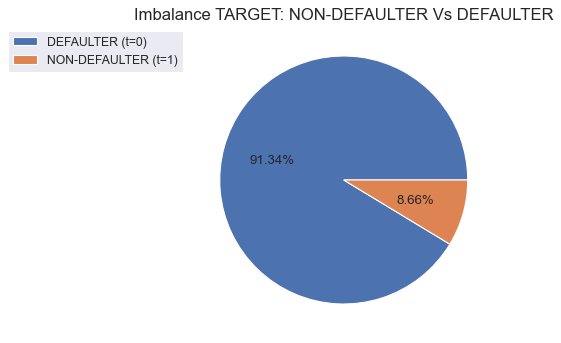

In [64]:
x = ['DEFAULTER (t=0)','NON-DEFAULTER (t=1)']
y = new_appl01['TARGET'].value_counts(normalize=True)*100
t = 'Imbalance TARGET: NON-DEFAULTER Vs DEFAULTER'
pie_plot(x,y,t)

In [65]:
# Checking Imbalance in 'NAME_CONTRACT_TYPE'
new_appl01.NAME_CONTRACT_TYPE.value_counts()/len(new_appl01)*100

Cash loans         89.722651
Revolving loans    10.277349
Name: NAME_CONTRACT_TYPE, dtype: float64

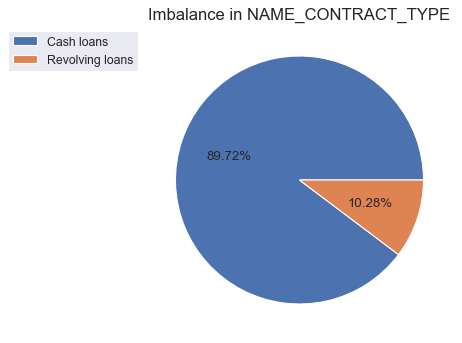

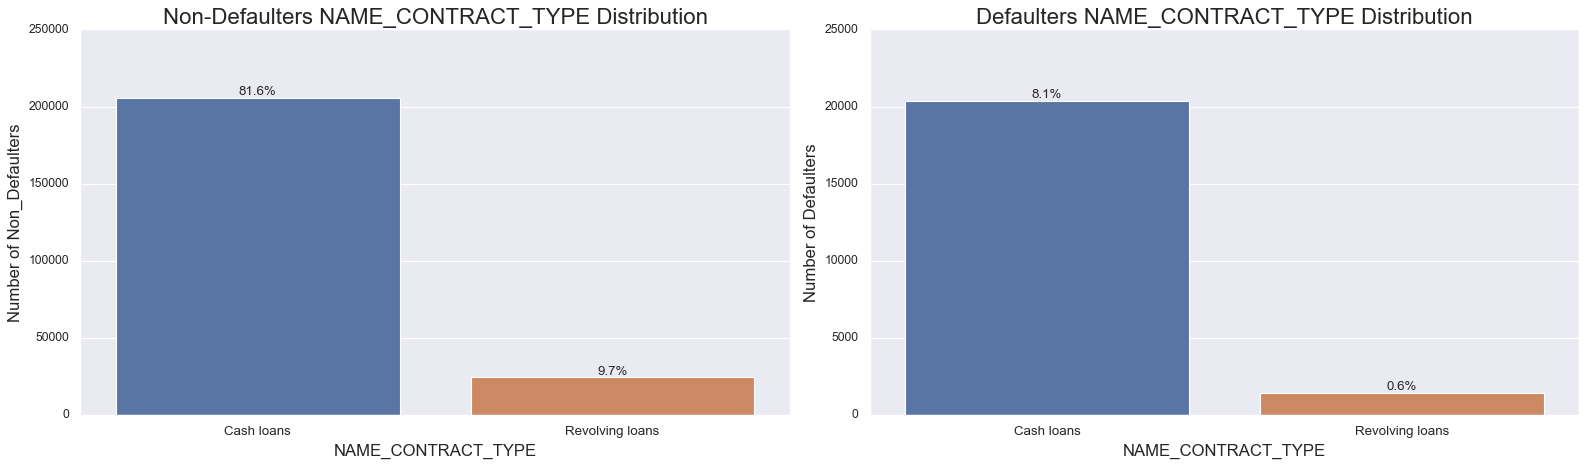

In [66]:
x = ['Cash loans','Revolving loans']
y = new_appl01['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100
t = 'Imbalance in NAME_CONTRACT_TYPE'
pie_plot(x,y,t)

Analysis_using_countplot('NAME_CONTRACT_TYPE', 0)

**Observations from above plot:**
* We can observe from the above graphs is that, the customers tend to apply for more loans in Cash Loans rather than in revolving loans.
* The customers opting for Revolving Loans are less likely to be Defaulters.

In [67]:
# Checking Imbalance in 'CODE_GENDER'
new_appl01.CODE_GENDER.value_counts()/len(new_appl01)*100

F    62.339522
M    37.660478
Name: CODE_GENDER, dtype: float64

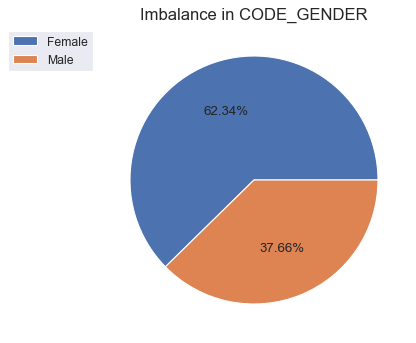

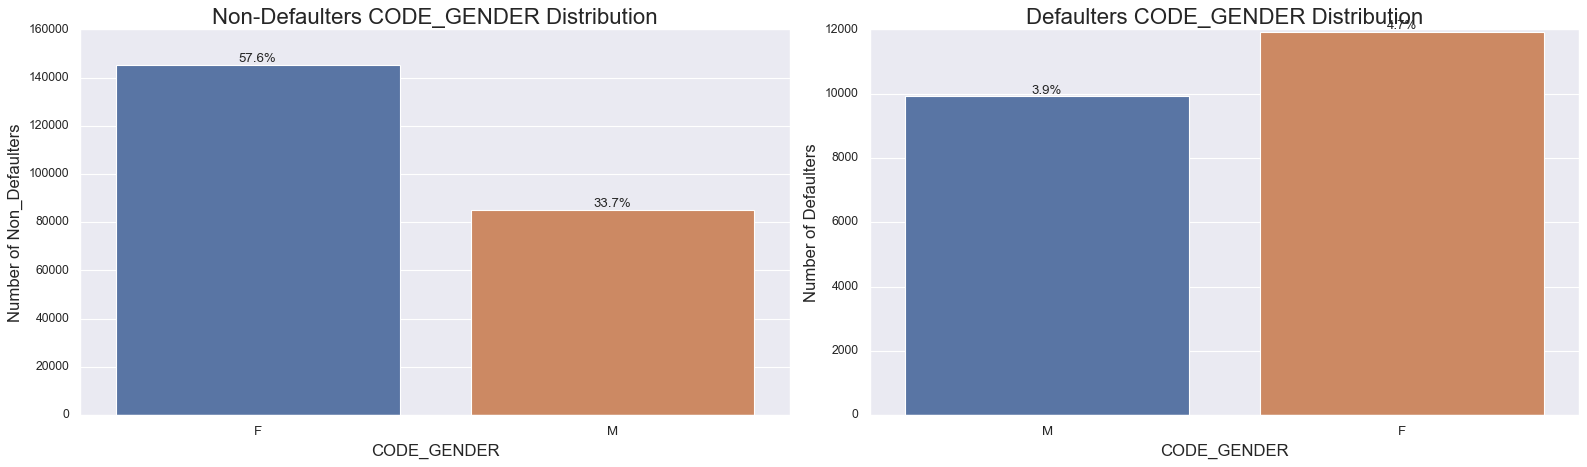

In [68]:
x = ['Female','Male']
y = new_appl01['CODE_GENDER'].value_counts(normalize=True)*100
t = 'Imbalance in CODE_GENDER'
pie_plot(x,y,t)

Analysis_using_countplot('CODE_GENDER', 0)

**Observations from above plot:**
* Around 62% of the total customers are Females, and around 37% are Males.
* 4.7% of the Females and 3.9% of the Males out of all the customers are defaulters.
* Among the Defaulters, the Males are more likely to be a defaulter.
* Hence giving loans to Females is less risky and should be preferred candidates.

In [69]:
# Checking Imbalance in 'NAME_INCOME_TYPE'
new_appl01.NAME_INCOME_TYPE.value_counts()/len(new_appl01)*100

Working                 62.971321
Commercial associate    28.404003
State servant            8.607622
Student                  0.007139
Pensioner                0.003966
Businessman              0.003966
Maternity leave          0.001983
Name: NAME_INCOME_TYPE, dtype: float64

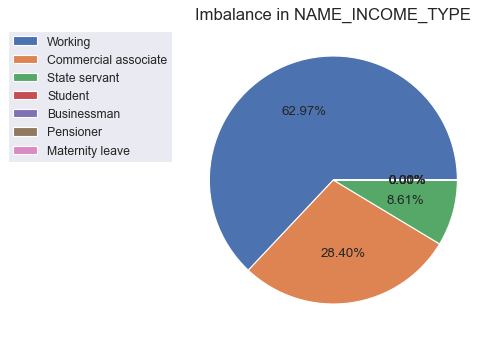

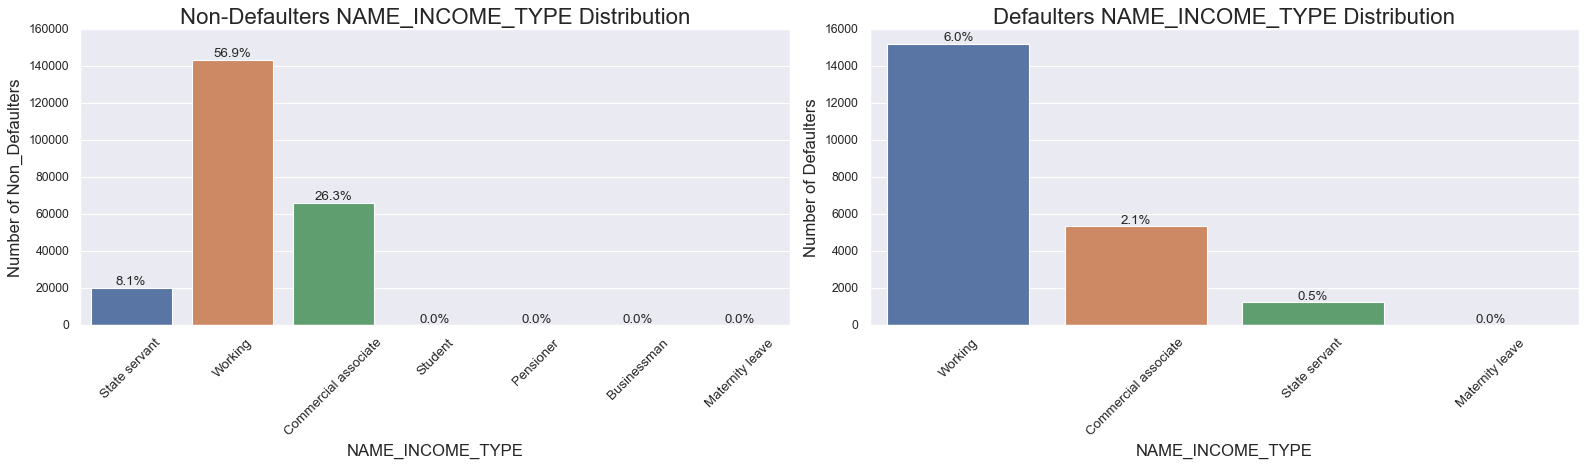

In [70]:
x = ['Working','Commercial associate', 'State servant', 'Student', 'Businessman', 'Pensioner', 'Maternity leave']
y = new_appl01['NAME_INCOME_TYPE'].value_counts(normalize=True)*100
t = 'Imbalance in NAME_INCOME_TYPE'
pie_plot(x,y,t)

Analysis_using_countplot('NAME_INCOME_TYPE', 45)

**Observations from above plot:**
* Majority of loans are applied by Working category when compared with the others.
* In comparison, State Servants are less likely to Default.

In [71]:
# Checking Imbalance in 'NAME_EDUCATION_TYPE'
new_appl01.NAME_EDUCATION_TYPE.value_counts()/len(new_appl01)*100

Secondary / secondary special    68.726922
Higher education                 26.441577
Incomplete higher                 3.869722
Lower secondary                   0.907047
Academic degree                   0.054732
Name: NAME_EDUCATION_TYPE, dtype: float64

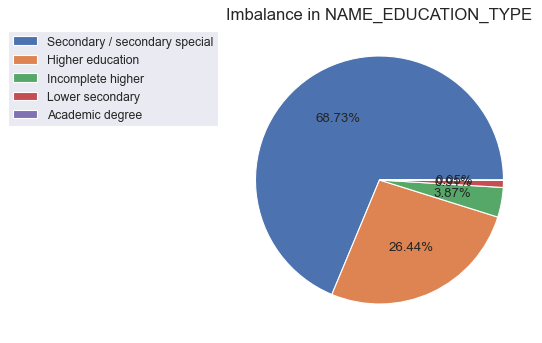

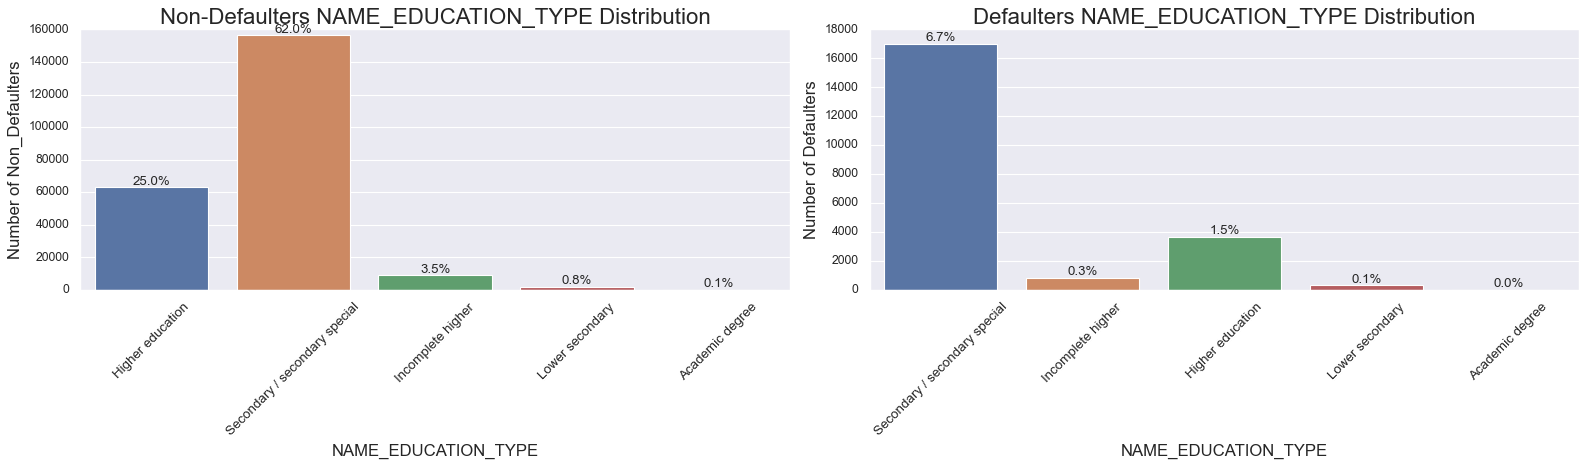

In [72]:
x = ['Secondary / secondary special','Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
y = new_appl01['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100
t = 'Imbalance in NAME_EDUCATION_TYPE'
pie_plot(x,y,t)

Analysis_using_countplot('NAME_EDUCATION_TYPE', 45)

**Observations from above plot:**
* Majority of loans are applied by 'Secondary/secondary special' when compared to the other categories.
* We can observe from Defaulters graph, 'Secondary/secondary special' is the highest followed by 'Higher education'

In [73]:
# Checking Imbalance in 'NAME_FAMILY_STATUS'
new_appl01.NAME_FAMILY_STATUS.value_counts()/len(new_appl01)*100

Married                 65.009895
Single / not married    15.593110
Civil marriage          10.389986
Separated                6.345756
Widow                    2.660458
Unknown                  0.000793
Name: NAME_FAMILY_STATUS, dtype: float64

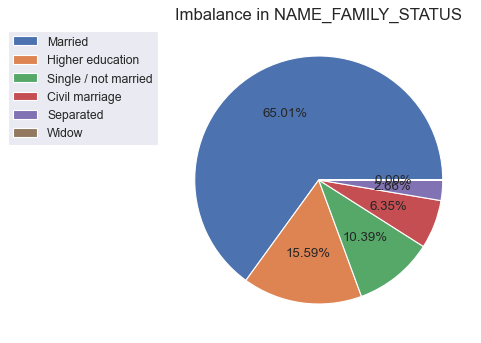

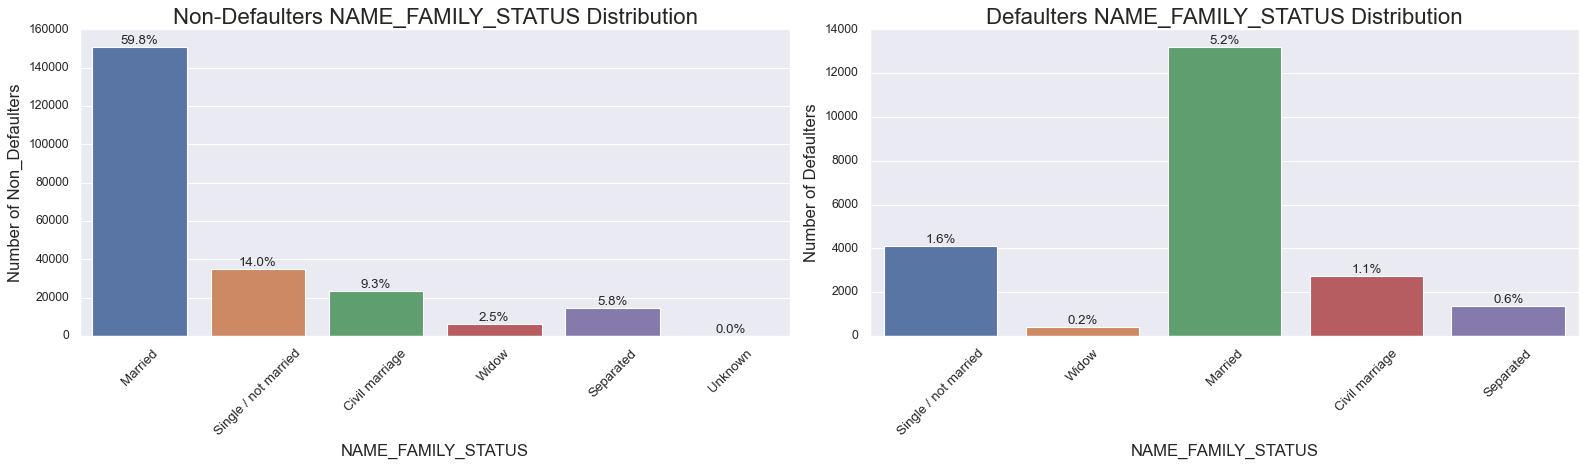

In [74]:
x = ['Married','Higher education', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']
y = new_appl01['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100
t = 'Imbalance in NAME_FAMILY_STATUS'
pie_plot(x,y,t)

Analysis_using_countplot('NAME_FAMILY_STATUS', 45)

**Observations from above plot:**
* Majority of loans are applied by 'Married' when compared to the other categories.
* Widows are less likely to be Defaulters.

In [75]:
# Checking Imbalance in 'NAME_HOUSING_TYPE'
new_appl01.NAME_HOUSING_TYPE.value_counts()/len(new_appl01)*100

House / apartment      87.445714
With parents            5.798832
Municipal apartment     3.589319
Rented apartment        1.854547
Office apartment        0.912599
Co-op apartment         0.398989
Name: NAME_HOUSING_TYPE, dtype: float64

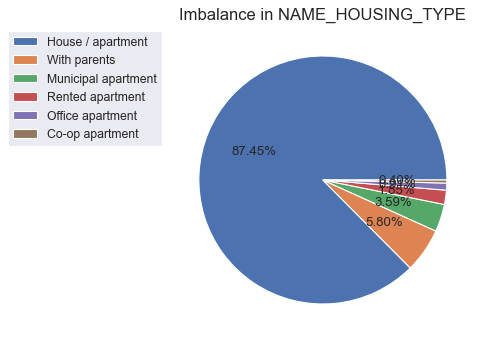

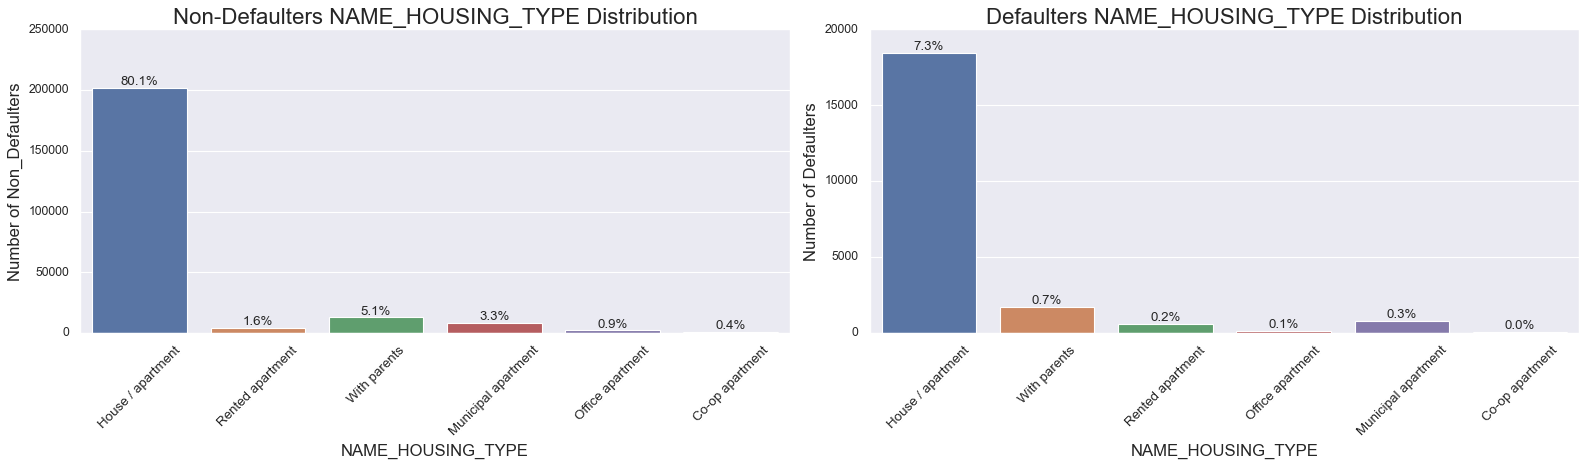

In [76]:
x = ['House / apartment','With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
y = new_appl01['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100
t = 'Imbalance in NAME_HOUSING_TYPE'
pie_plot(x,y,t)

Analysis_using_countplot('NAME_HOUSING_TYPE', 45)

**Observations from above plot:**
* Majority of loans are applied by customers living in 'House / apartment' when compared to the other categories.
* Customer living in Muncipal apartments are more likely to be defaulters.

In [77]:
new_appl01.Age_Group.value_counts()/len(new_appl01)*100

(35.0, 40.0]    17.194224
(40.0, 45.0]    15.587161
(30.0, 35.0]    15.583195
(25.0, 30.0]    14.450081
(45.0, 50.0]    13.011577
(50.0, 55.0]    11.197484
(20.0, 25.0]     6.487346
(55.0, 60.0]     4.732348
(60.0, 65.0]     1.556297
(65.0, 70.0]     0.199891
Name: Age_Group, dtype: float64

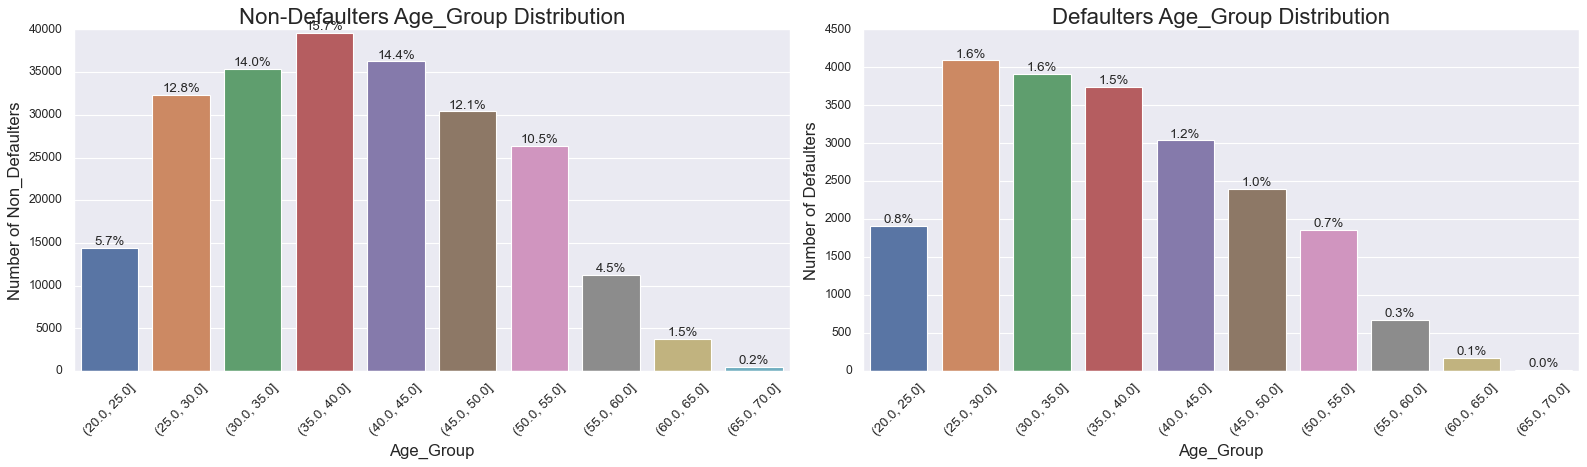

In [78]:
Analysis_using_countplot('Age_Group', 45)

**Obeservation from the above plot:**
* Majority of the loans were applied by the customers between the age 25 and 50.
* Customers under 30 years are more likely to be defaulters.
* Customers above 60 years are less likely to be defaulters.

In [79]:
new_appl01.OCCUPATION_TYPE.value_counts()/len(new_appl01)*100

Laborers                 38.155844
Sales staff              12.731967
Core staff               10.934532
Managers                  8.475948
Drivers                   7.378132
High skill tech staff     4.513419
Accountants               3.891932
Medicine staff            3.385858
Security staff            2.665614
Cooking staff             2.358242
Cleaning staff            1.844632
Private service staff     1.051809
Low-skill Laborers        0.830104
Waiters/barmen staff      0.534630
Secretaries               0.517576
Realty agents             0.297854
HR staff                  0.223291
IT staff                  0.208617
Name: OCCUPATION_TYPE, dtype: float64

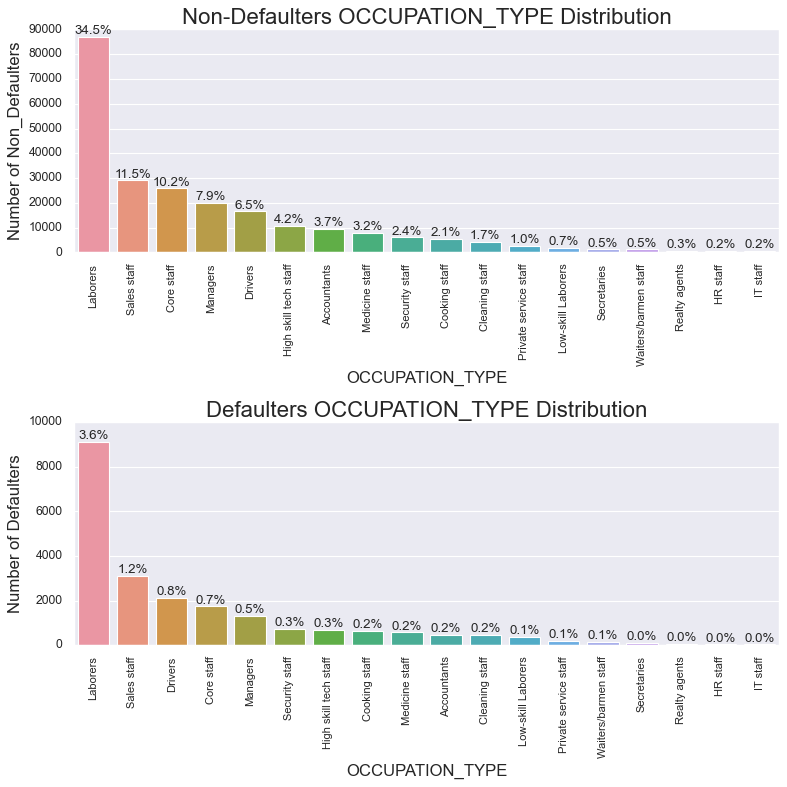

In [80]:
plt.figure(figsize = (10,10))
    
plt.subplot(2,1,1)
sns.set_style('darkgrid')
t_0 = sns.countplot('OCCUPATION_TYPE', data = Target_0, order = Target_0.OCCUPATION_TYPE.value_counts().index)
plt.title('Non-Defaulters OCCUPATION_TYPE Distribution', fontsize = 20)
plt.xlabel('OCCUPATION_TYPE', fontsize = 15)
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Number of Non_Defaulters', fontsize = 15)
   
for p in t_0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    t_0.annotate('{:.1f}%'.format(100*y/len(new_appl01)), (x.mean(), y), ha='center', va='bottom')
    
plt.subplot(2,1,2)
sns.set_style('darkgrid')
t_1 = sns.countplot('OCCUPATION_TYPE', data = Target_1, order = Target_1.OCCUPATION_TYPE.value_counts().index)
plt.title('Defaulters OCCUPATION_TYPE Distribution', fontsize = 20)
plt.xlabel('OCCUPATION_TYPE', fontsize = 15)
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Number of Defaulters', fontsize = 15)
    
for p in t_1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    t_1.annotate('{:.1f}%'.format(100*y/len(new_appl01)), (x.mean(), y), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

**Observation from the above plot:**
* Around 38% of the total loans were applied by the customers having profession Labourers. They also have higher proportion of defaulters.
* Sales staff also have a slightly higher proportion of defaulters when compared with the others.
* We can also observe that IT/HR staff have lower proportion of defaults.

In [81]:
def Analysis_using_countplot_with_hue_GENDER(i,R):
    
    plt.figure(figsize = (20,6))
    
    plt.subplot(1,2,1)
    sns.set_style('darkgrid')
    t_0 = sns.countplot(i, data = Target_0, hue = 'CODE_GENDER')
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    for p in t_0.patches:
        percentage = f'{100 * p.get_height() / len(new_appl01):.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        t_0.annotate(percentage, (x, y), ha='center', va='center')

    
    plt.subplot(1,2,2)
    sns.set_style('darkgrid')
    t_1 = sns.countplot(i, data = Target_1, hue = 'CODE_GENDER')
    plt.title('Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Defaulters', fontsize = 15)
    
    for p in t_1.patches:
        percentage = f'{100 * p.get_height() / len(new_appl01):.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        t_1.annotate(percentage, (x, y), ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

In [82]:
new_appl01.Income_Range.value_counts()/len(new_appl01)*100

verylow     29.042544
medium      22.412022
veryhigh    16.897956
low         16.042469
high        15.605008
Name: Income_Range, dtype: float64

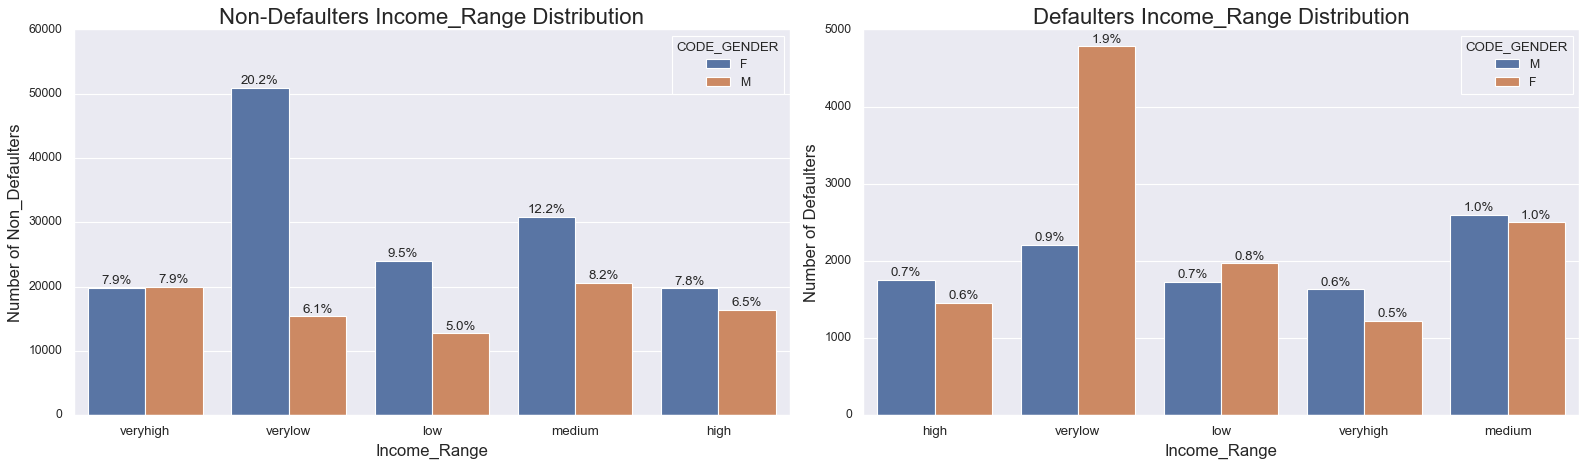

In [83]:
Analysis_using_countplot_with_hue_GENDER('Income_Range', 0)

In [84]:
new_appl01.Credit_Range.value_counts()/len(new_appl01)*100

low         23.068411
verylow     20.021655
veryhigh    19.920123
high        19.901879
medium      17.087932
Name: Credit_Range, dtype: float64

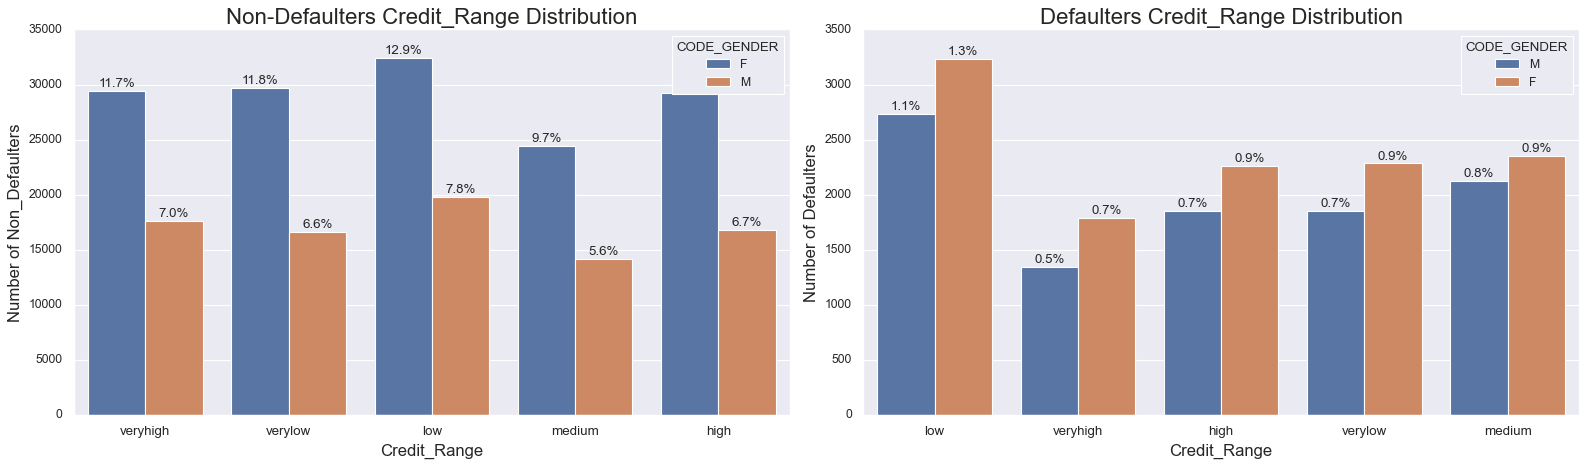

In [85]:
Analysis_using_countplot_with_hue_GENDER('Credit_Range', 0)

In [86]:
new_appl01.Age_Group.value_counts()/len(new_appl01)*100

(35.0, 40.0]    17.194224
(40.0, 45.0]    15.587161
(30.0, 35.0]    15.583195
(25.0, 30.0]    14.450081
(45.0, 50.0]    13.011577
(50.0, 55.0]    11.197484
(20.0, 25.0]     6.487346
(55.0, 60.0]     4.732348
(60.0, 65.0]     1.556297
(65.0, 70.0]     0.199891
Name: Age_Group, dtype: float64

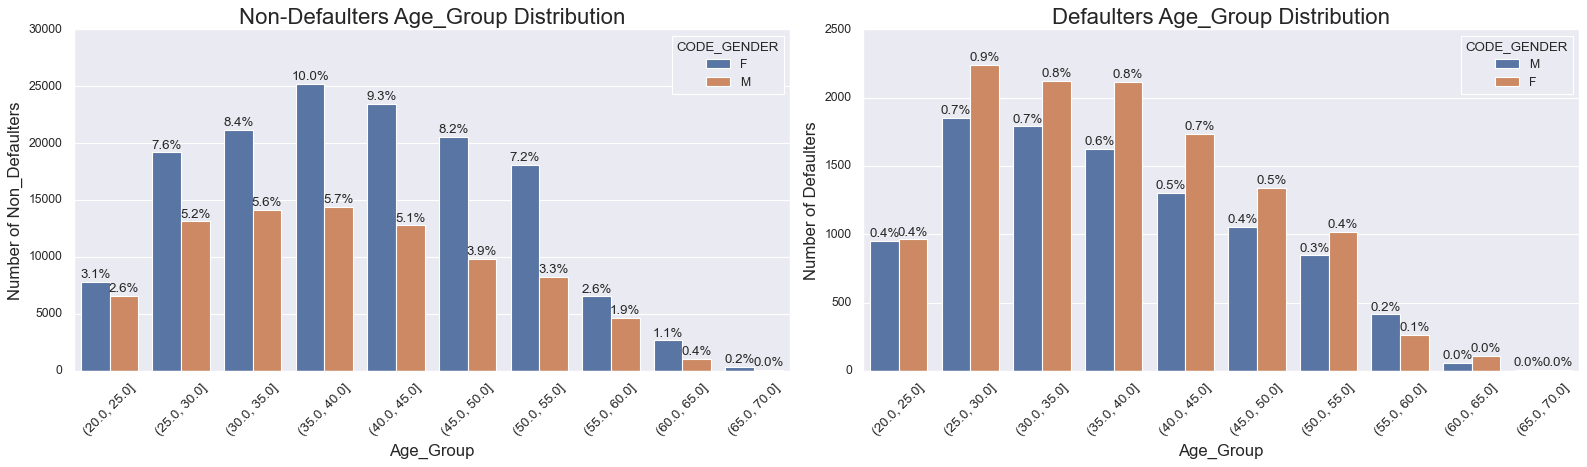

In [87]:
Analysis_using_countplot_with_hue_GENDER('Age_Group', 45)

In [88]:
new_appl01.NAME_HOUSING_TYPE.value_counts()/len(new_appl01)*100

House / apartment      87.445714
With parents            5.798832
Municipal apartment     3.589319
Rented apartment        1.854547
Office apartment        0.912599
Co-op apartment         0.398989
Name: NAME_HOUSING_TYPE, dtype: float64

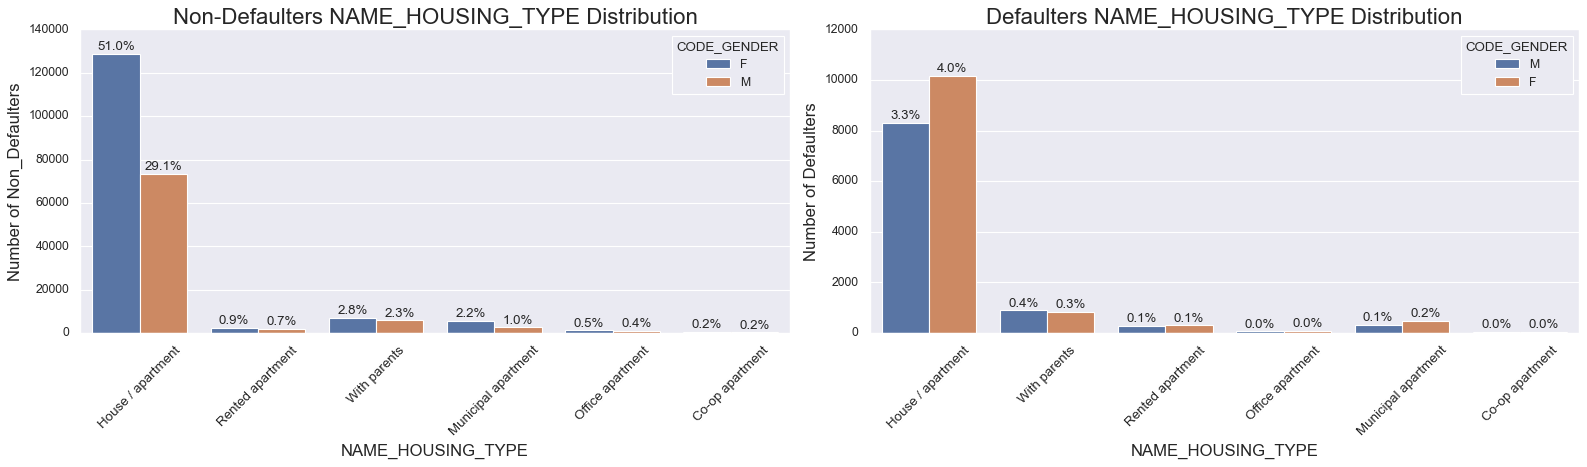

In [89]:
Analysis_using_countplot_with_hue_GENDER('NAME_HOUSING_TYPE', 45)

In [90]:
new_appl01.NAME_FAMILY_STATUS.value_counts()/len(new_appl01)*100

Married                 65.009895
Single / not married    15.593110
Civil marriage          10.389986
Separated                6.345756
Widow                    2.660458
Unknown                  0.000793
Name: NAME_FAMILY_STATUS, dtype: float64

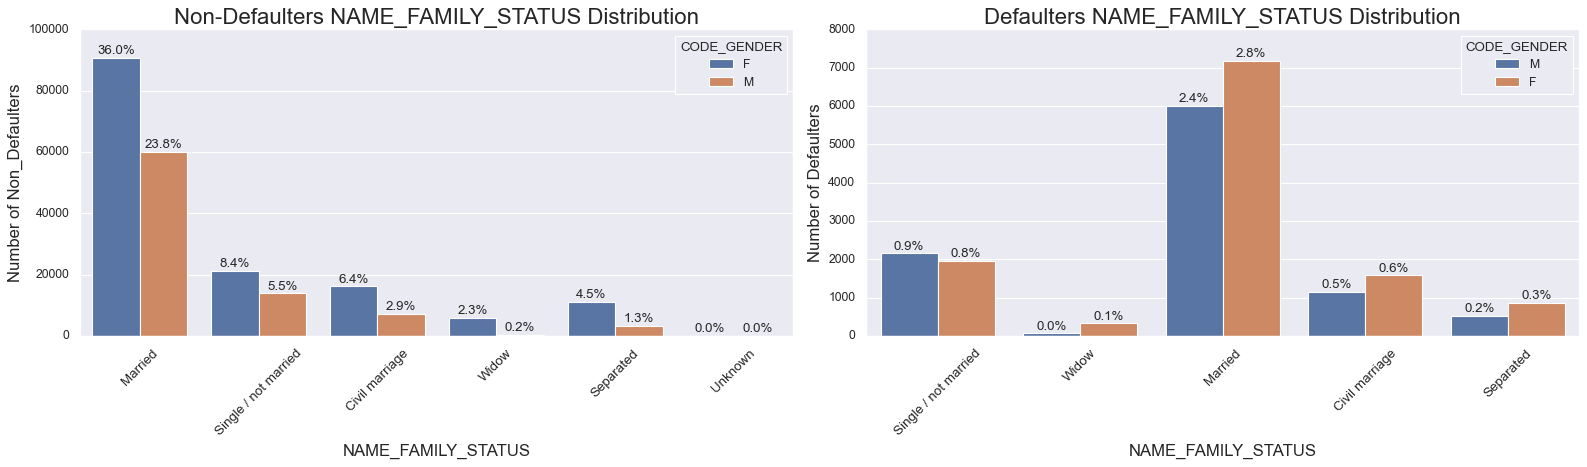

In [91]:
Analysis_using_countplot_with_hue_GENDER('NAME_FAMILY_STATUS', 45)

In [92]:
new_appl01.NAME_EDUCATION_TYPE.value_counts()/len(new_appl01)*100

Secondary / secondary special    68.726922
Higher education                 26.441577
Incomplete higher                 3.869722
Lower secondary                   0.907047
Academic degree                   0.054732
Name: NAME_EDUCATION_TYPE, dtype: float64

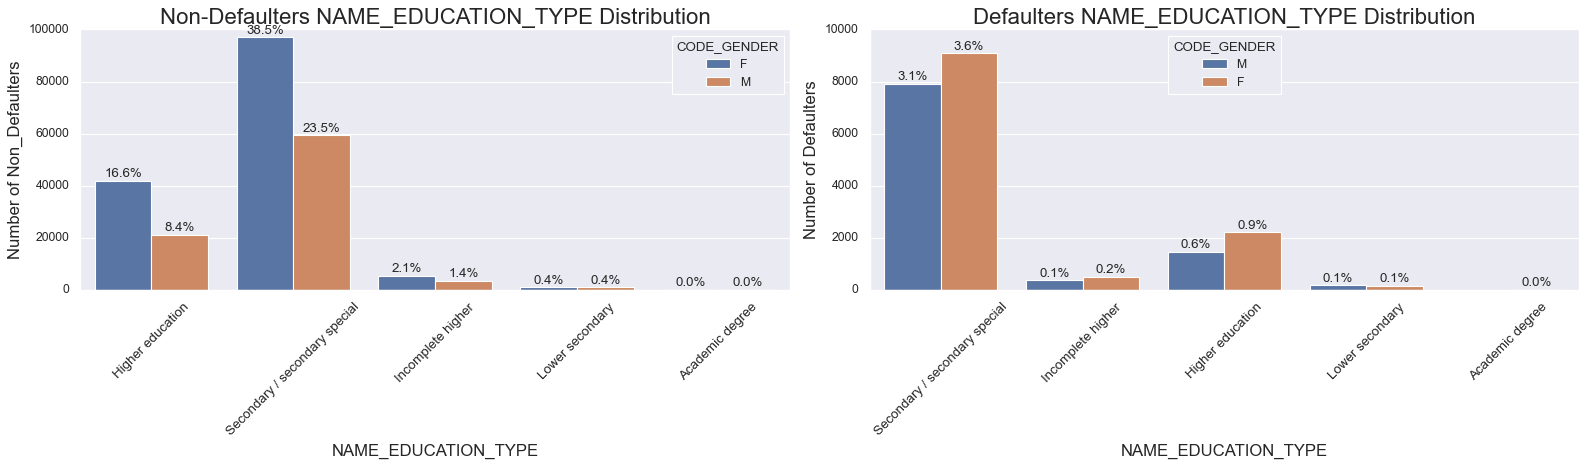

In [93]:
Analysis_using_countplot_with_hue_GENDER('NAME_EDUCATION_TYPE', 45)

In [94]:
new_appl01.NAME_INCOME_TYPE.value_counts()/len(new_appl01)*100

Working                 62.971321
Commercial associate    28.404003
State servant            8.607622
Student                  0.007139
Pensioner                0.003966
Businessman              0.003966
Maternity leave          0.001983
Name: NAME_INCOME_TYPE, dtype: float64

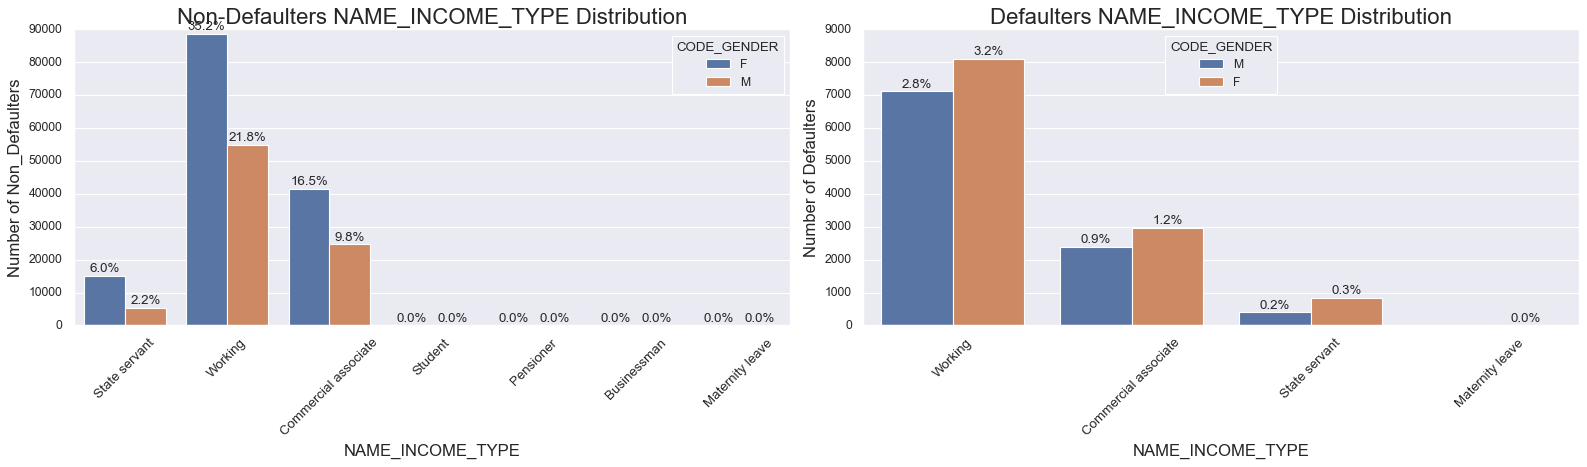

In [95]:
Analysis_using_countplot_with_hue_GENDER('NAME_INCOME_TYPE', 45)

## *4. Univariatve Analysis using Continuous Variables.*

In [96]:
def Analysis_using_distplot2(i,R):
    
    plt.figure(figsize = (15,15))
        
    plt.subplot(4,2,1)
    sns.set_style('darkgrid')
    sns.distplot(Target_0[~Target_0[i].isna()][i], color="#4CB391")
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    plt.subplot(4,2,2)
    sns.set_style('darkgrid')
    sns.distplot(Target_1[~Target_1[i].isna()][i], color="#4CB391")
    plt.title('Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Defaulters', fontsize = 15)
    
    plt.subplot(4,2,3)
    sns.set_style('darkgrid')
    sns.boxplot(Target_0[~Target_0[i].isna()][i], color="#4CB391")
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    plt.subplot(4,2,4)
    sns.set_style('darkgrid')
    sns.boxplot(Target_0[~Target_0[i].isna()][i], color="#4CB391")
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    plt.tight_layout()
    plt.show()

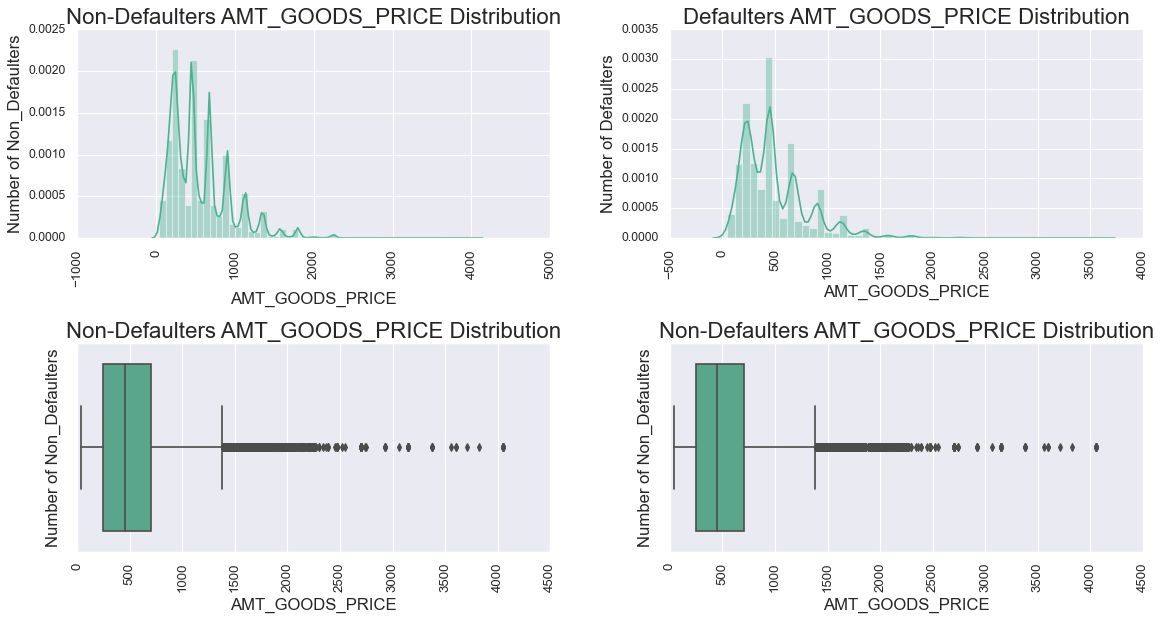

In [97]:
Analysis_using_distplot2('AMT_GOODS_PRICE',90)

**Observations from above plot:**
* AMT_GOODS_PRICE for Defaulters peaks for the range[ 0 - 500,000 ].
* But for Defaulters it peaks from [20,000 - 30,000].

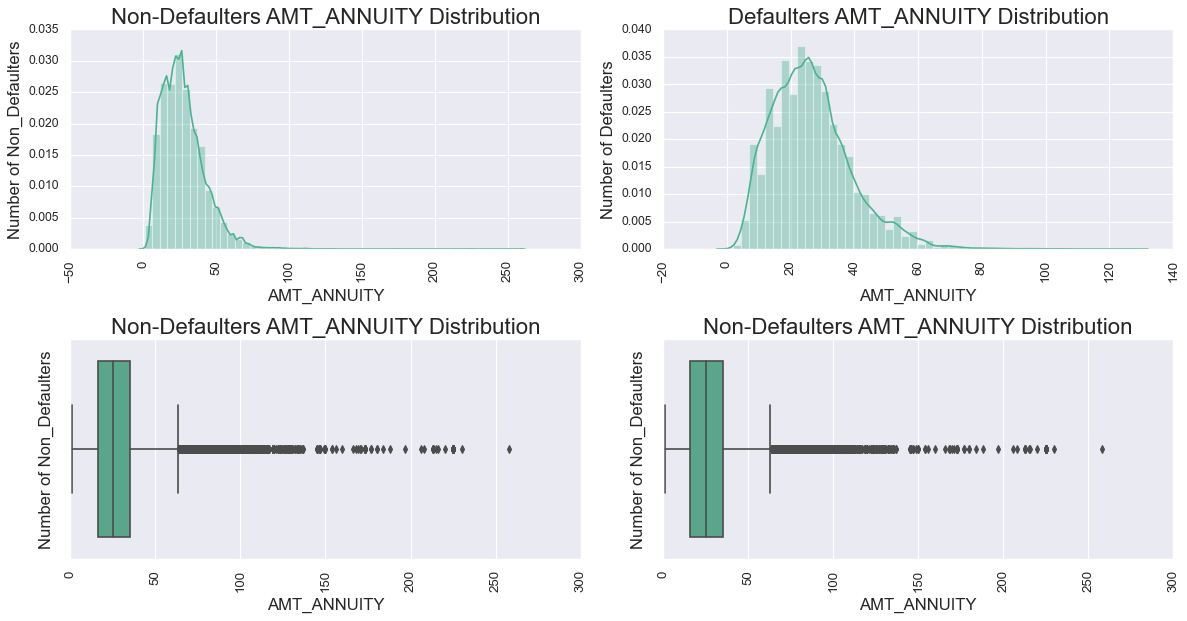

In [98]:
Analysis_using_distplot2('AMT_ANNUITY',90)

In [99]:
print(Target_0.AMT_ANNUITY.mean())
print(Target_1.AMT_ANNUITY.mean())

27.417443183298452
26.375681245706435


**Observations from above plot:**
* For Annuity, we observe a slight increase in the proportion of Defaulters when compared with non-defaulters. 
* The maximum percentage of the defaulters are in the range [0 – 40,000].
* The average Annuity for both the Defaulters and Non-Defaulters is similar, which is around 25,000. 

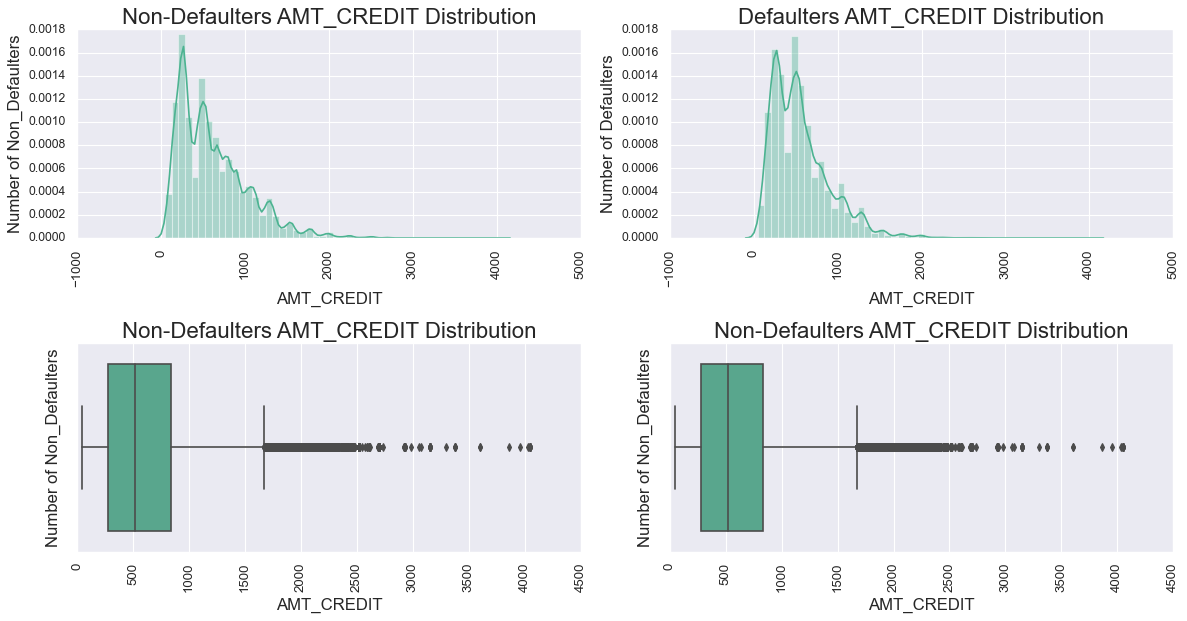

In [100]:
Analysis_using_distplot2('AMT_CREDIT',90)

**Observations from above plot:**
* For Credit, we observe a slight increase in the proportion of Defaulters when compared to non-defaulters.
* The maximum percentage of the defaulters are in the range [0 – 1000K].

## 5. Bivariate Analysis for Numeric Variables in Target_0 and Target_1.

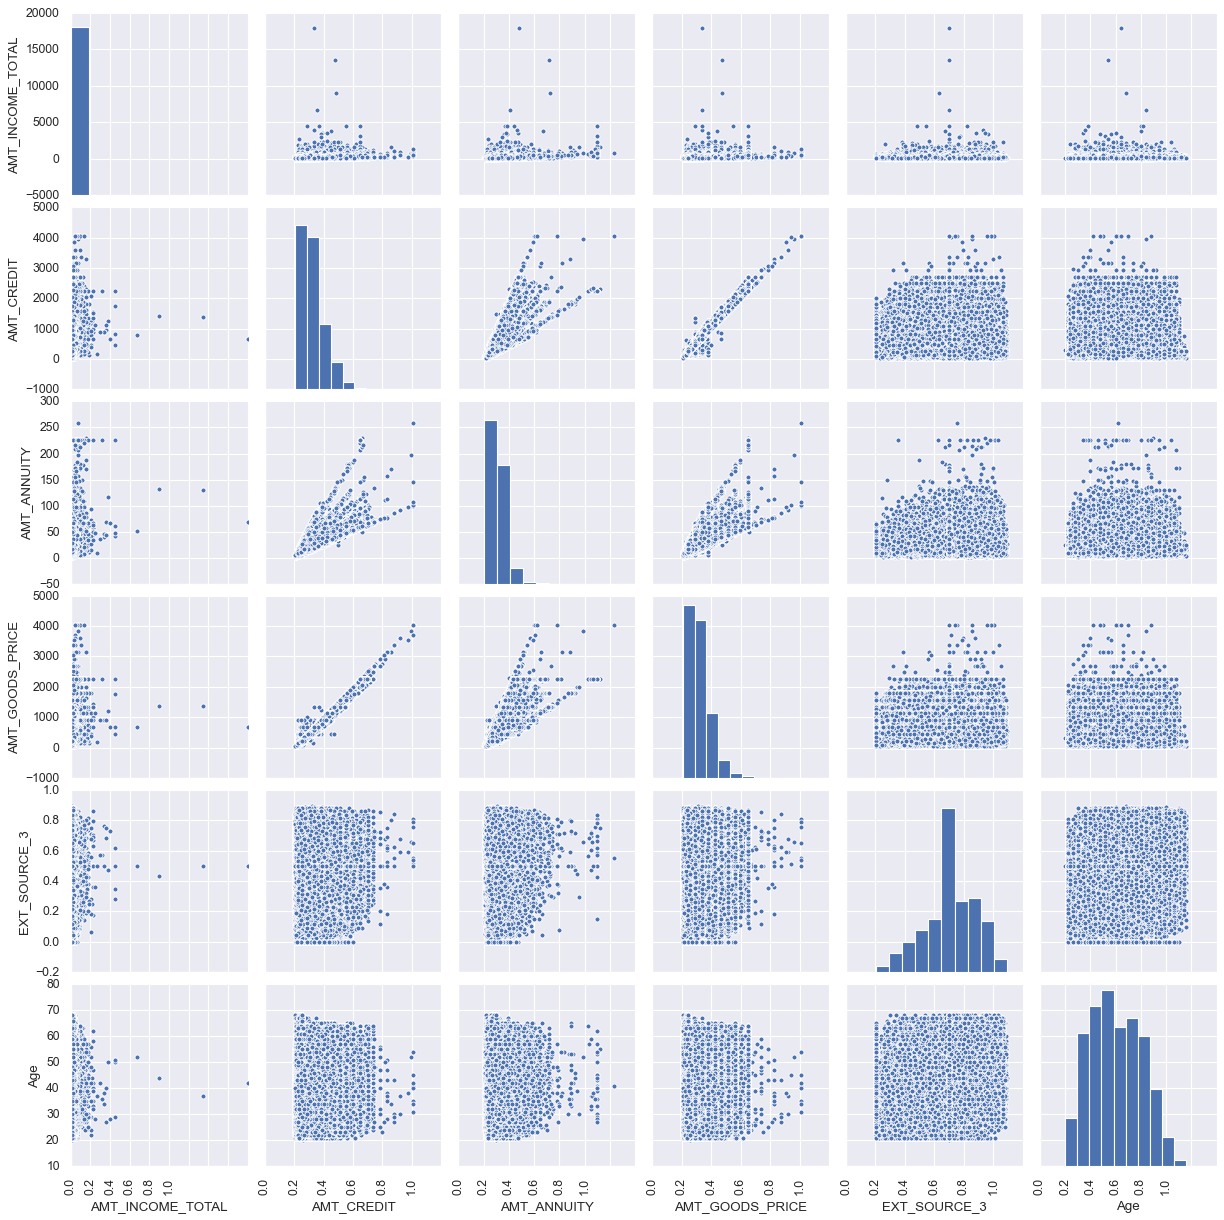

In [101]:
temp = Target_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'Age']]        
p = sns.pairplot(temp)
for ax in p.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

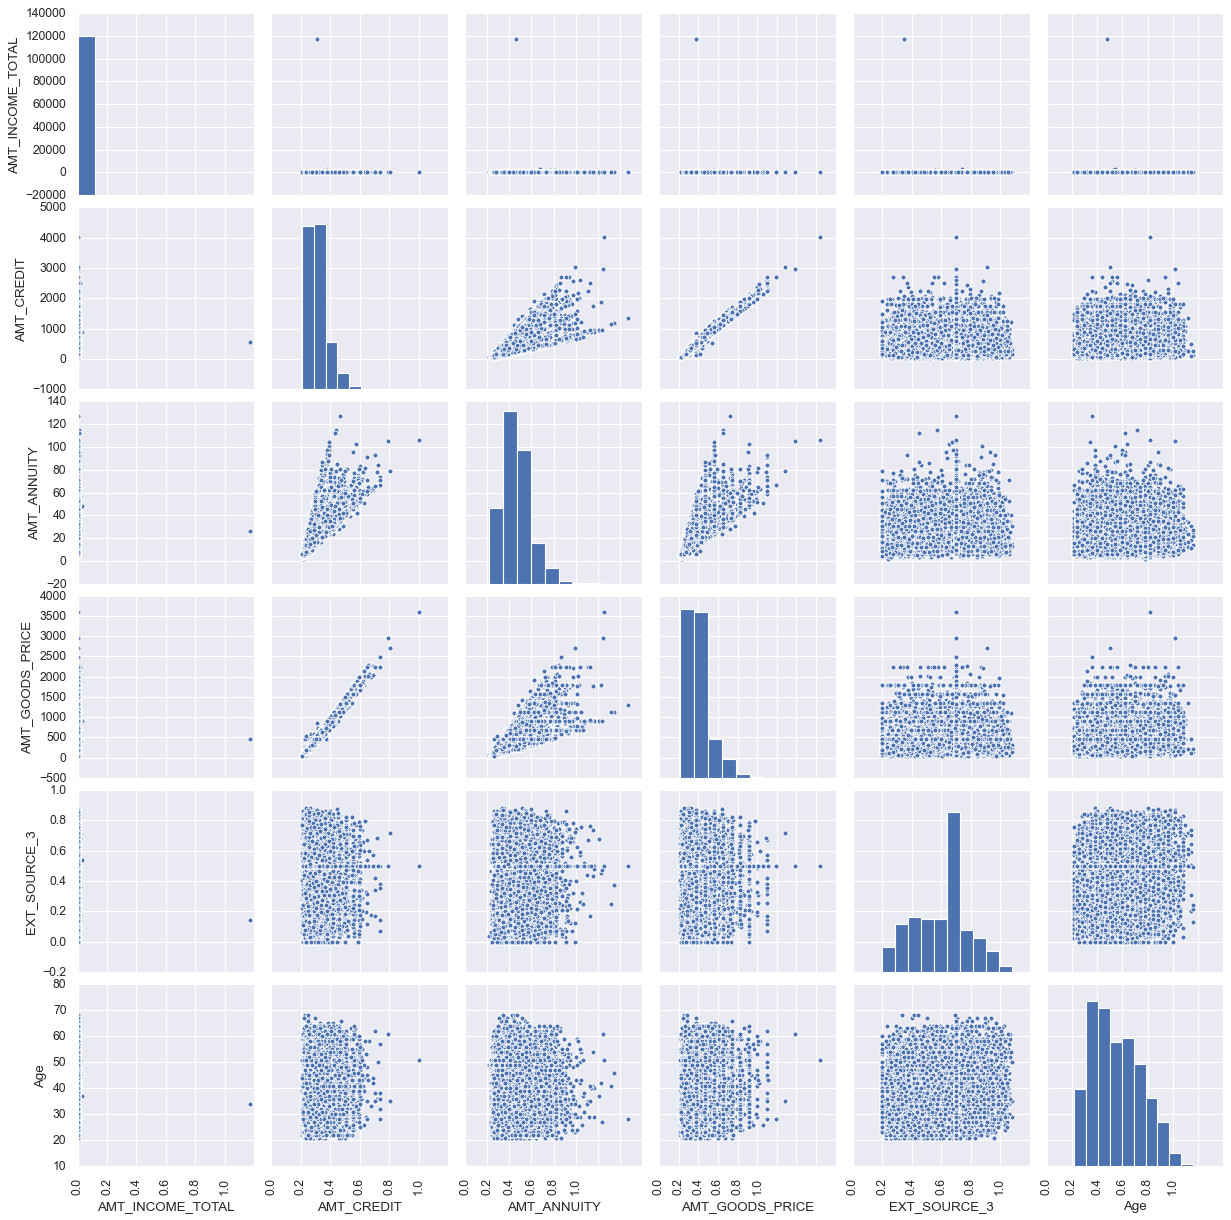

In [102]:
temp = Target_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'Age']]        
p = sns.pairplot(temp)
for ax in p.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [103]:
def plot_bivar(i,j):

    plt.figure(figsize = (15,5))

    plt.subplot(1,2,1)
    sns.scatterplot(x = i, y = j, data = Target_0)
    plt.title('{} vs {} for Non-Defaulters'.format(i,j), fontsize = 15)

    plt.subplot(1,2,2)
    sns.scatterplot(x = i, y = j, data = Target_1)
    plt.title('{} vs {} for Defaulters'.format(i,j), fontsize = 15)
    plt.tight_layout()
    plt.show()

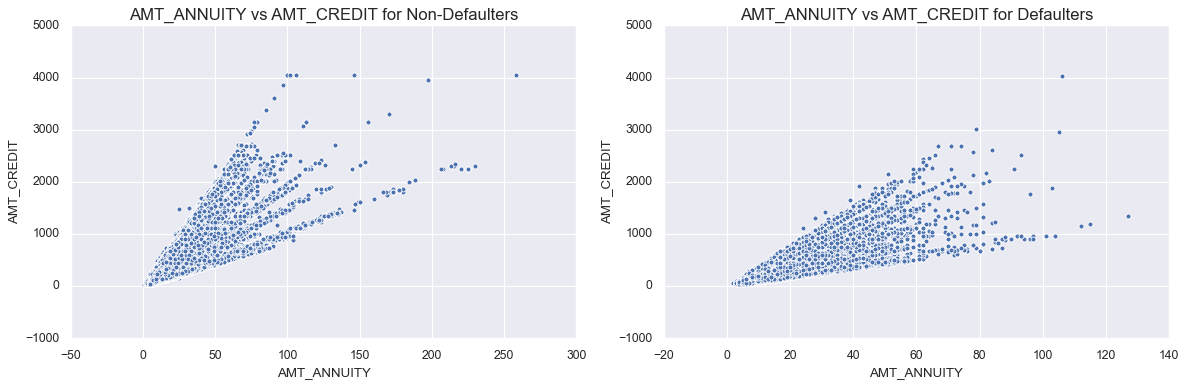

In [104]:
plot_bivar('AMT_ANNUITY', 'AMT_CREDIT')

**Observation from the above plot:**
* As we observed from the heat-map, the correlation between Annuity and Credit amount for Non-Defaulters is 0.76 and for Defaulters is 0.75.
* Hence, we can say that Annuity is directly proportional to the Credit amount for both Non-Defaulters and Defaulters. So as the Annuity increases the Credit amount also increases.

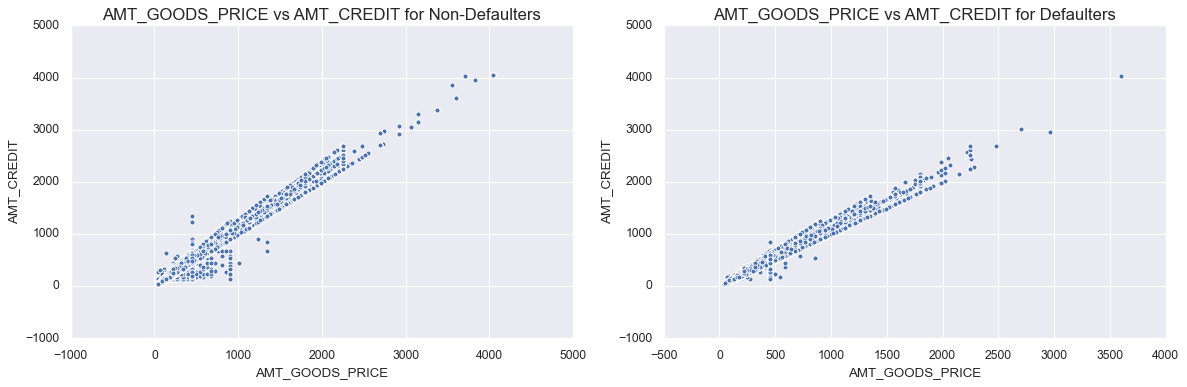

In [105]:
plot_bivar('AMT_GOODS_PRICE', 'AMT_CREDIT')

**Observation from the above plot:**
* As we observed from the heat-map, the correlation between Goods Price and Credit amount for Non-Defaulters is 0.99 and for Defaulters is 0.98.
* Hence, we can say that Goods Price is directly proportional to the Credit amount for both Non-Defaulters and Defaulters. So as the Goods Price increases the Credit amount also increases.

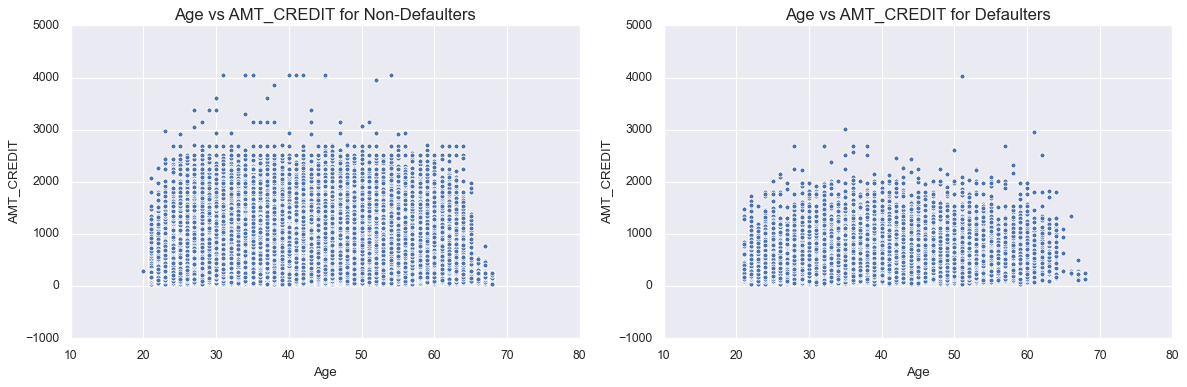

In [106]:
plot_bivar('Age', 'AMT_CREDIT')

**Observation from the above plot:**
* We observe that, the customer above 60 years are less likely to be a defaulter.
* Also the loan default is concentrated below 2000K loan amount and the customers between  20 and 60 years.

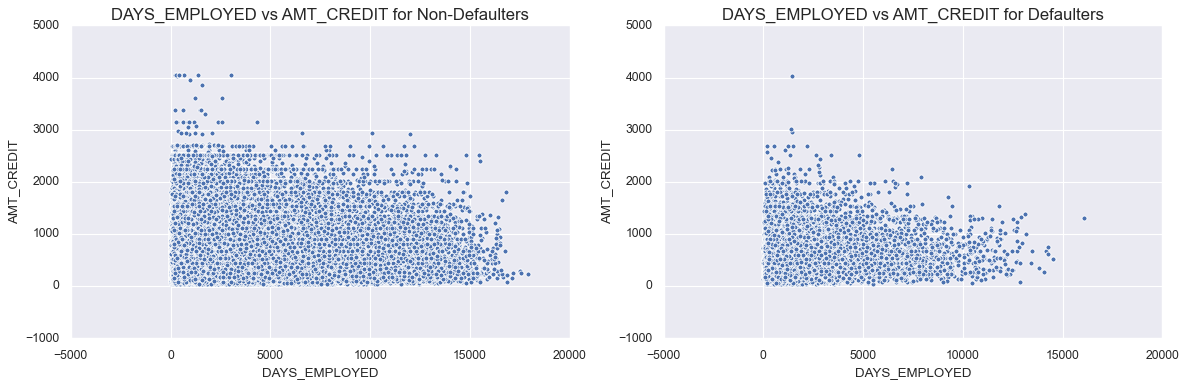

In [107]:
plot_bivar('DAYS_EMPLOYED', 'AMT_CREDIT')

**Observation from the above plot:**
* We observe that, as the customer’s experience increases the less likely the customers tend to default, customers with less experience tend to be defaulters.
* Also the loan default is concentrated below 2000K loan amount and the customers above 25 years of experience.

## 6. Correlation between the variables in Target_0 and Target_1

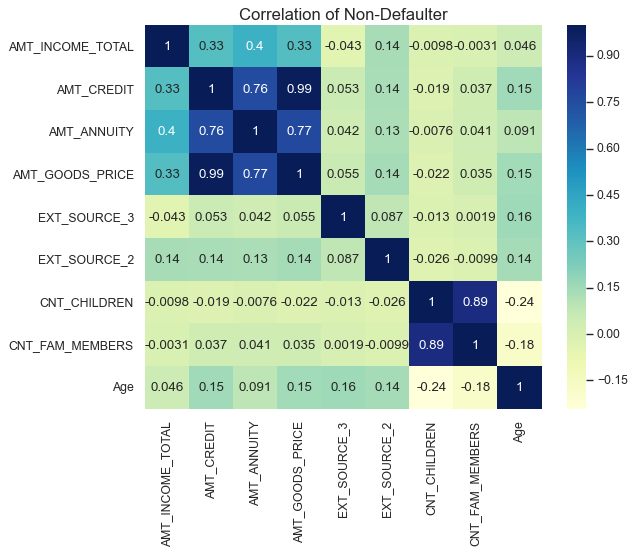

In [108]:
temp = Target_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Age']]
Target0 = temp.corr(method='pearson')

plt.title('Correlation of Non-Defaulter', fontsize = 15)
sns.heatmap(Target0, cmap="YlGnBu", annot=True)
plt.show()

In [109]:
Target0.unstack().sort_values()

CNT_CHILDREN      Age                -0.242389
Age               CNT_CHILDREN       -0.242389
CNT_FAM_MEMBERS   Age                -0.178004
Age               CNT_FAM_MEMBERS    -0.178004
EXT_SOURCE_3      AMT_INCOME_TOTAL   -0.042511
AMT_INCOME_TOTAL  EXT_SOURCE_3       -0.042511
EXT_SOURCE_2      CNT_CHILDREN       -0.026114
CNT_CHILDREN      EXT_SOURCE_2       -0.026114
                  AMT_GOODS_PRICE    -0.022288
AMT_GOODS_PRICE   CNT_CHILDREN       -0.022288
AMT_CREDIT        CNT_CHILDREN       -0.018706
CNT_CHILDREN      AMT_CREDIT         -0.018706
EXT_SOURCE_3      CNT_CHILDREN       -0.013098
CNT_CHILDREN      EXT_SOURCE_3       -0.013098
CNT_FAM_MEMBERS   EXT_SOURCE_2       -0.009932
EXT_SOURCE_2      CNT_FAM_MEMBERS    -0.009932
CNT_CHILDREN      AMT_INCOME_TOTAL   -0.009801
AMT_INCOME_TOTAL  CNT_CHILDREN       -0.009801
CNT_CHILDREN      AMT_ANNUITY        -0.007574
AMT_ANNUITY       CNT_CHILDREN       -0.007574
CNT_FAM_MEMBERS   AMT_INCOME_TOTAL   -0.003109
AMT_INCOME_TO

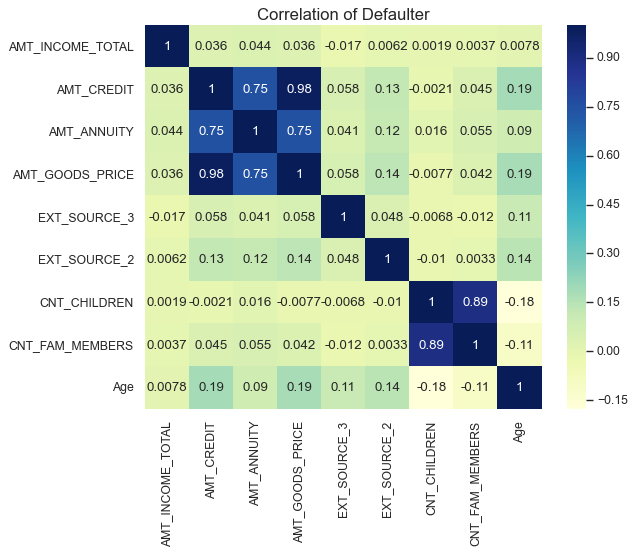

In [110]:
temp = Target_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Age']]
Target1 = temp.corr()

plt.title('Correlation of Defaulter', fontsize = 15)
sns.heatmap(Target1, cmap="YlGnBu", annot=True)
plt.show()

In [111]:
Target1.unstack().sort_values()

CNT_CHILDREN      Age                -0.176565
Age               CNT_CHILDREN       -0.176565
                  CNT_FAM_MEMBERS    -0.110334
CNT_FAM_MEMBERS   Age                -0.110334
EXT_SOURCE_3      AMT_INCOME_TOTAL   -0.016864
AMT_INCOME_TOTAL  EXT_SOURCE_3       -0.016864
CNT_FAM_MEMBERS   EXT_SOURCE_3       -0.011927
EXT_SOURCE_3      CNT_FAM_MEMBERS    -0.011927
EXT_SOURCE_2      CNT_CHILDREN       -0.010479
CNT_CHILDREN      EXT_SOURCE_2       -0.010479
                  AMT_GOODS_PRICE    -0.007709
AMT_GOODS_PRICE   CNT_CHILDREN       -0.007709
EXT_SOURCE_3      CNT_CHILDREN       -0.006804
CNT_CHILDREN      EXT_SOURCE_3       -0.006804
                  AMT_CREDIT         -0.002091
AMT_CREDIT        CNT_CHILDREN       -0.002091
AMT_INCOME_TOTAL  CNT_CHILDREN        0.001873
CNT_CHILDREN      AMT_INCOME_TOTAL    0.001873
EXT_SOURCE_2      CNT_FAM_MEMBERS     0.003285
CNT_FAM_MEMBERS   EXT_SOURCE_2        0.003285
                  AMT_INCOME_TOTAL    0.003694
AMT_INCOME_TO

**Observation from the HeatMap:**
* There appears to be High Coorelation between AMT_CREDIT and AMT_GOODS_PRICE in both the Defaulter and Non-Defaulter HeatMap.
* There is a slight decrease in the correlation between AMT_ANNUITY and AMT_GOODS_PRICE for Defaulters when compared to Non-Defaulters.


## 7. Inspecting the Dataframes and Data Cleaning of prev_appl.

In [112]:
prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [113]:
print('Dimension of Prev_appl: ', prev_appl.shape)

Dimension of Prev_appl:  (1670214, 37)


In [114]:
# Replacing the 'XNA' and 'XAP' values with NaN.
prev_appl.replace('XNA', np.nan, inplace=True)
prev_appl.replace('XAP', np.nan, inplace=True)

# Checking the percentage of Null Values present in each columns.
round(prev_appl.isnull().sum() * 100 / len(prev_appl) , 4).sort_values(ascending = False)

RATE_INTEREST_PRIMARY          99.6437
RATE_INTEREST_PRIVILEGED       99.6437
NAME_CASH_LOAN_PURPOSE         95.8308
CODE_REJECT_REASON             81.3271
NAME_PRODUCT_TYPE              63.6844
NAME_GOODS_CATEGORY            56.9274
AMT_DOWN_PAYMENT               53.6365
RATE_DOWN_PAYMENT              53.6365
NAME_SELLER_INDUSTRY           51.2342
NAME_TYPE_SUITE                49.1198
NFLAG_INSURED_ON_APPROVAL      40.2981
DAYS_LAST_DUE                  40.2981
DAYS_LAST_DUE_1ST_VERSION      40.2981
DAYS_FIRST_DUE                 40.2981
DAYS_FIRST_DRAWING             40.2981
DAYS_TERMINATION               40.2981
NAME_PAYMENT_TYPE              37.5631
NAME_YIELD_GROUP               30.9670
AMT_GOODS_PRICE                23.0818
AMT_ANNUITY                    22.2867
CNT_PAYMENT                    22.2864
NAME_PORTFOLIO                 22.2864
NAME_CLIENT_TYPE                0.1162
NAME_CONTRACT_TYPE              0.0207
PRODUCT_COMBINATION             0.0207
AMT_CREDIT               

In [115]:
# Dropping columns which have percentage of Null Values more than 40%.
prev_appl01 = prev_appl.drop(prev_appl.columns[prev_appl.isnull().mean() >= 0.40], axis = 1)

print('Original data:' , prev_appl.shape)
print('Treated data :' , prev_appl01.shape)

Original data: (1670214, 37)
Treated data : (1670214, 21)


In [116]:
round(prev_appl01.isnull().sum() * 100 / len(prev_appl01) , 4).sort_values(ascending = False)

NAME_PAYMENT_TYPE              37.5631
NAME_YIELD_GROUP               30.9670
AMT_GOODS_PRICE                23.0818
AMT_ANNUITY                    22.2867
CNT_PAYMENT                    22.2864
NAME_PORTFOLIO                 22.2864
NAME_CLIENT_TYPE                0.1162
PRODUCT_COMBINATION             0.0207
NAME_CONTRACT_TYPE              0.0207
AMT_CREDIT                      0.0001
WEEKDAY_APPR_PROCESS_START      0.0000
SK_ID_CURR                      0.0000
AMT_APPLICATION                 0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NAME_CONTRACT_STATUS            0.0000
DAYS_DECISION                   0.0000
CHANNEL_TYPE                    0.0000
SELLERPLACE_AREA                0.0000
SK_ID_PREV                      0.0000
dtype: float64

In [117]:
# Converting negatie columns to positive.
neg_col = [col for col in prev_appl01 if col.startswith('DAYS')]

prev_appl01[neg_col] = abs(prev_appl01[neg_col])
prev_appl01.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved             73   
1                       1             Approved            164   
2                       1             Approved            301   
3                       1             Approved            512   
4                       1              Refused            781   

       NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0  Cash through the bank         Repeater            POS   
1                    NaN         Repeater           Cash   
2  Cash through the bank         Repeater           Cash   
3  Cash through the bank         Repeater           Cash   
4  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide                35         12.0           middle   
1           Contact center                -1         36.0       low_action   
2  Credit and cash offices                -1         12.0             high   
3  Credit and cash offices                -1         12.0           middle   
4  Credit and cash offices                -1         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [118]:
# Checking the summary for any irregularities.
prev_appl01.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00  
25%              1.000000e+00   2.800000e+02     -1.000000e+00  6.000000e+00  
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00   1.300000e+03      8.200000e+01  2.400000e+01  
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01

In [119]:
prev_appl01.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [120]:
round(prev_appl01[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'AMT_CREDIT']].describe(),4)

AMT_ANNUITY  AMT_GOODS_PRICE   CNT_PAYMENT    AMT_CREDIT
count  1.297979e+06     1.284699e+06  1.297984e+06  1.670213e+06
mean   1.595512e+04     2.278473e+05  1.605410e+01  1.961140e+05
std    1.478214e+04     3.153966e+05  1.456730e+01  3.185746e+05
min    0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00
25%    6.321780e+03     5.084100e+04  6.000000e+00  2.416050e+04
50%    1.125000e+04     1.123200e+05  1.200000e+01  8.054100e+04
75%    2.065842e+04     2.340000e+05  2.400000e+01  2.164185e+05
max    4.180581e+05     6.905160e+06  8.400000e+01  6.905160e+06

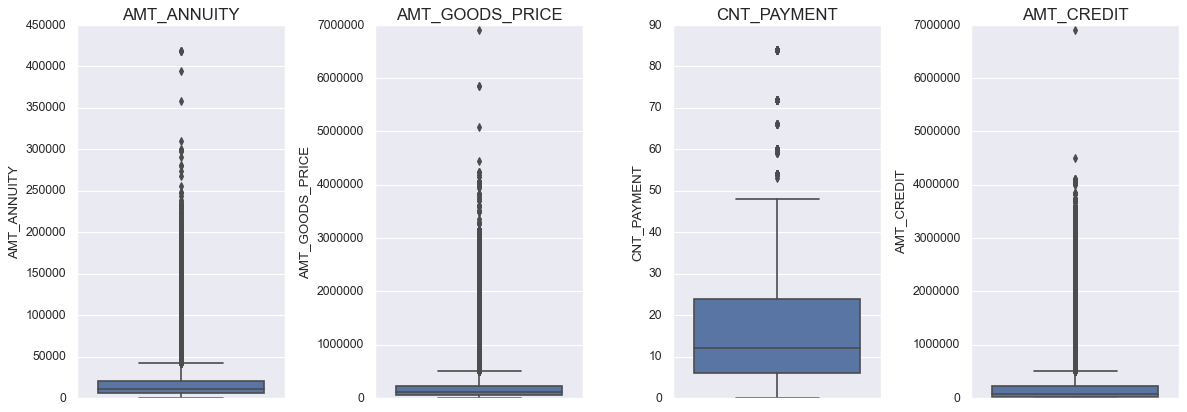

In [121]:
amt_prev = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'AMT_CREDIT']

plt.figure(figsize = [15,20])
for i in enumerate(amt_prev):
    plt.subplot(4, 4, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = prev_appl01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()    
plt.show()

**Choosing the best metric:**
* As we observe from the above graph 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT' and 'AMT_CREDIT' have outliers in there distribution, so we will be using the median values of these columns to impute in place of missing values.

In [122]:
prev_appl01.AMT_GOODS_PRICE = prev_appl01.AMT_GOODS_PRICE.fillna(prev_appl01.AMT_GOODS_PRICE.median())
prev_appl01.CNT_PAYMENT = prev_appl01.CNT_PAYMENT.fillna(prev_appl01.CNT_PAYMENT.median())
prev_appl01.AMT_CREDIT = prev_appl01.AMT_CREDIT.fillna(prev_appl01.AMT_CREDIT.median())
prev_appl01.AMT_ANNUITY = prev_appl01.AMT_ANNUITY.fillna(prev_appl01.AMT_ANNUITY.median())

print('prev_appl01.AMT_GOODS_PRICE:' , prev_appl01.AMT_GOODS_PRICE.isnull().sum())
print('prev_appl01.CNT_PAYMENT    :' , prev_appl01.CNT_PAYMENT.isnull().sum())
print('prev_appl01.AMT_CREDIT     :' , prev_appl01.AMT_CREDIT.isnull().sum())
print('prev_appl01.AMT_ANNUITY    :' , prev_appl01.AMT_ANNUITY.isnull().sum())

prev_appl01.AMT_GOODS_PRICE: 0
prev_appl01.CNT_PAYMENT    : 0
prev_appl01.AMT_CREDIT     : 0
prev_appl01.AMT_ANNUITY    : 0


In [123]:
prev_appl01.NAME_YIELD_GROUP.value_counts()

middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [124]:
prev_appl01.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [125]:
prev_appl01.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [126]:
prev_appl01.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [127]:
prev_appl01.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [128]:
prev_appl01.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

**Choosing the best metric:**
* As we have dealt with all the continuous variable the ones left are categorical ones, for this we will be using mode of the respective columns to impute in place of the missing values

In [129]:
prev_appl01.NAME_YIELD_GROUP = prev_appl01.NAME_YIELD_GROUP.fillna(prev_appl01.NAME_YIELD_GROUP.mode()[0])
prev_appl01.NAME_PORTFOLIO = prev_appl01.NAME_PORTFOLIO.fillna(prev_appl01.NAME_PORTFOLIO.mode()[0])
prev_appl01.NAME_CLIENT_TYPE = prev_appl01.NAME_CLIENT_TYPE.fillna(prev_appl01.NAME_CLIENT_TYPE.mode()[0])
prev_appl01.PRODUCT_COMBINATION = prev_appl01.PRODUCT_COMBINATION.fillna(prev_appl01.PRODUCT_COMBINATION.mode()[0])
prev_appl01.NAME_CONTRACT_TYPE = prev_appl01.NAME_CONTRACT_TYPE.fillna(prev_appl01.NAME_CONTRACT_TYPE.mode()[0])
prev_appl01.NAME_PAYMENT_TYPE = prev_appl01.NAME_PAYMENT_TYPE.fillna(prev_appl01.NAME_PAYMENT_TYPE.mode()[0])


print('prev_appl01.NAME_YIELD_GROUP   :' , prev_appl01.NAME_YIELD_GROUP.isnull().sum())
print('prev_appl01.NAME_PORTFOLIO     :' , prev_appl01.NAME_PORTFOLIO.isnull().sum())
print('prev_appl01.NAME_CLIENT_TYPE   :' , prev_appl01.NAME_CLIENT_TYPE.isnull().sum())
print('prev_appl01.PRODUCT_COMBINATION:' , prev_appl01.PRODUCT_COMBINATION.isnull().sum())
print('prev_appl01.NAME_CONTRACT_TYPE :' , prev_appl01.NAME_CONTRACT_TYPE.isnull().sum())
print('prev_appl01.NAME_PAYMENT_TYPE  :' , prev_appl01.NAME_PAYMENT_TYPE.isnull().sum())

prev_appl01.NAME_YIELD_GROUP   : 0
prev_appl01.NAME_PORTFOLIO     : 0
prev_appl01.NAME_CLIENT_TYPE   : 0
prev_appl01.PRODUCT_COMBINATION: 0
prev_appl01.NAME_CONTRACT_TYPE : 0
prev_appl01.NAME_PAYMENT_TYPE  : 0


In [130]:
round(prev_appl01.isnull().sum() * 100 / len(prev_appl01) , 4).sort_values(ascending = False)

PRODUCT_COMBINATION            0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_YIELD_GROUP               0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
NAME_CLIENT_TYPE               0.0
NAME_PORTFOLIO                 0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
CNT_PAYMENT                    0.0
SK_ID_PREV                     0.0
dtype: float64

In [131]:
# Checking the dtypes of th columns.
prev_appl01.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
NAME_CLIENT_TYPE                object
NAME_PORTFOLIO                  object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION             object
dtype: object

## 8. Univaritive Analysis on prev_appl01.

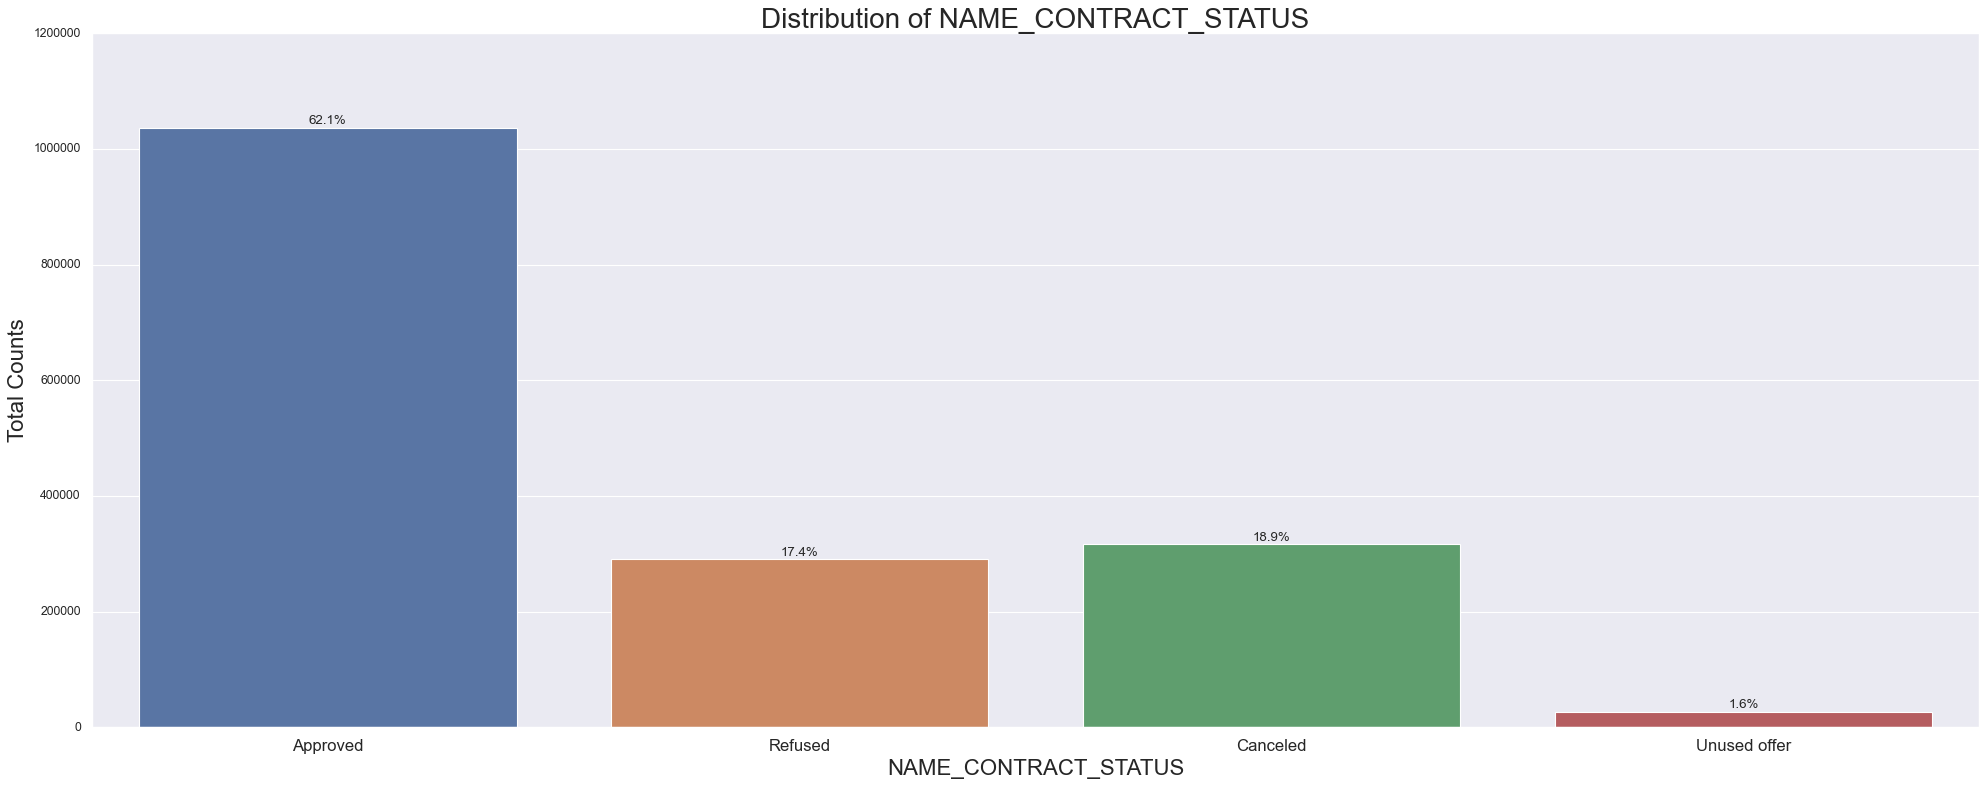

In [132]:
plt.figure(figsize = (25,10))
sns.set_style('darkgrid')
contract = sns.countplot('NAME_CONTRACT_STATUS', data = prev_appl01)
plt.title('Distribution of NAME_CONTRACT_STATUS', fontsize = 25)
plt.xlabel('NAME_CONTRACT_STATUS', fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.ylabel('Total Counts', fontsize = 20)

for p in contract.patches:
    percentage = f'{100 * p.get_height() / len(prev_appl01):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    contract.annotate(percentage, (x, y), ha='center', va='center')
    
plt.tight_layout()
plt.show()

In [133]:
def countplot_on_prev(i):
    
    plt.figure(figsize = (15,6))
        
    sns.set_style('darkgrid')
    prev = sns.countplot(i, data = prev_appl01, hue = 'NAME_CONTRACT_STATUS')
    plt.title('Distribution of {}'.format(i), fontsize = 25)
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation = 0,fontsize = 15)
    plt.ylabel('Total Counts', fontsize = 20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    for p in prev.patches:
        percentage = f'{100 * p.get_height() / len(prev_appl01):.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        prev.annotate(percentage, (x, y), ha='center', va='center')
    
    
    plt.show()

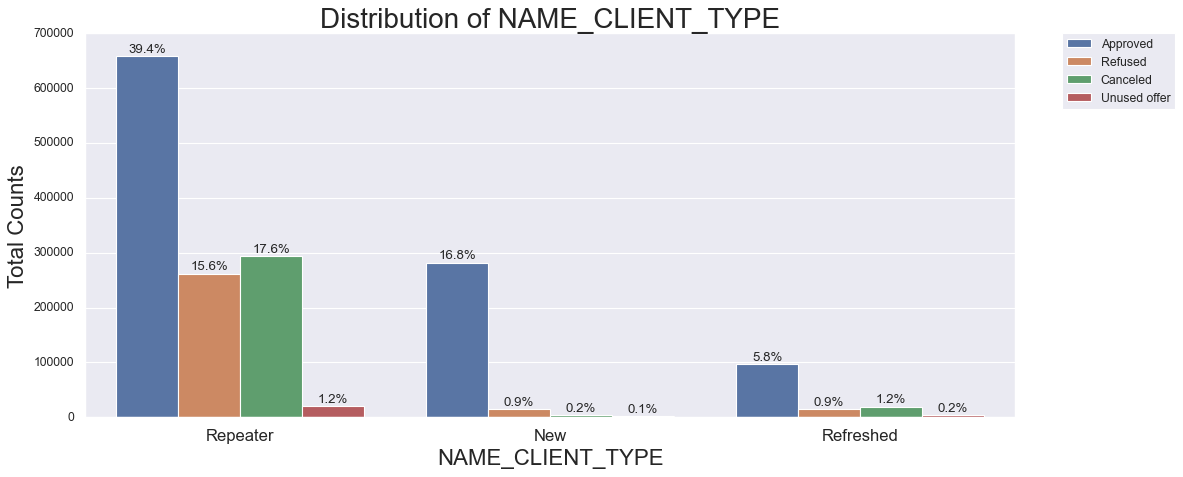

In [134]:
countplot_on_prev('NAME_CLIENT_TYPE')

**Observations from above plot:**
* Most of the loan applications are from repeat customers, out of the total applications most of the customers are repeaters. They also get refused most often.

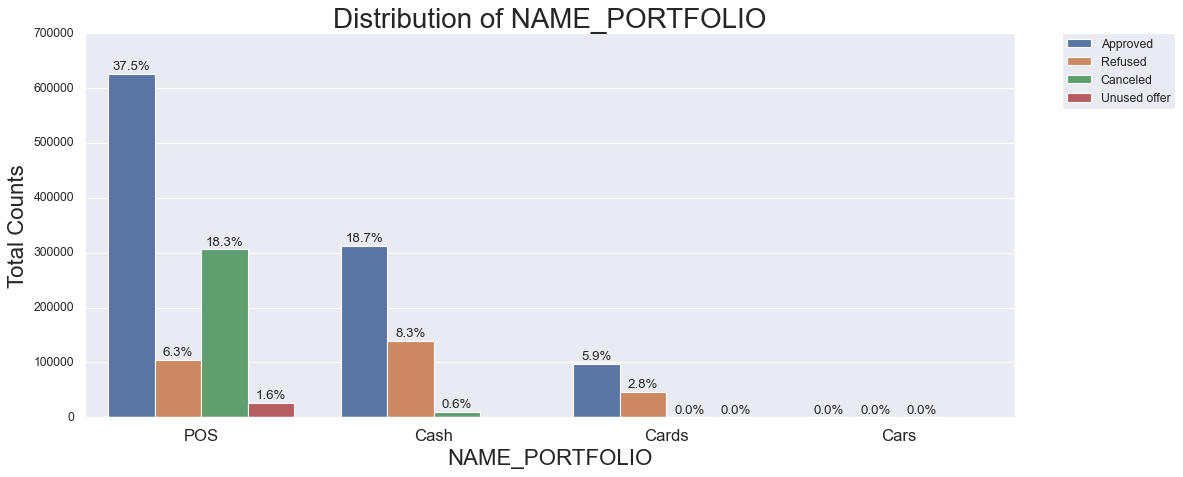

In [135]:
countplot_on_prev('NAME_PORTFOLIO')

**Observations from above plot:**
* From the above chart, we observe that, most of the loan applications are for 'POS' and 'Cash'. Also 'POS' and 'Cash' loans are refused the most.

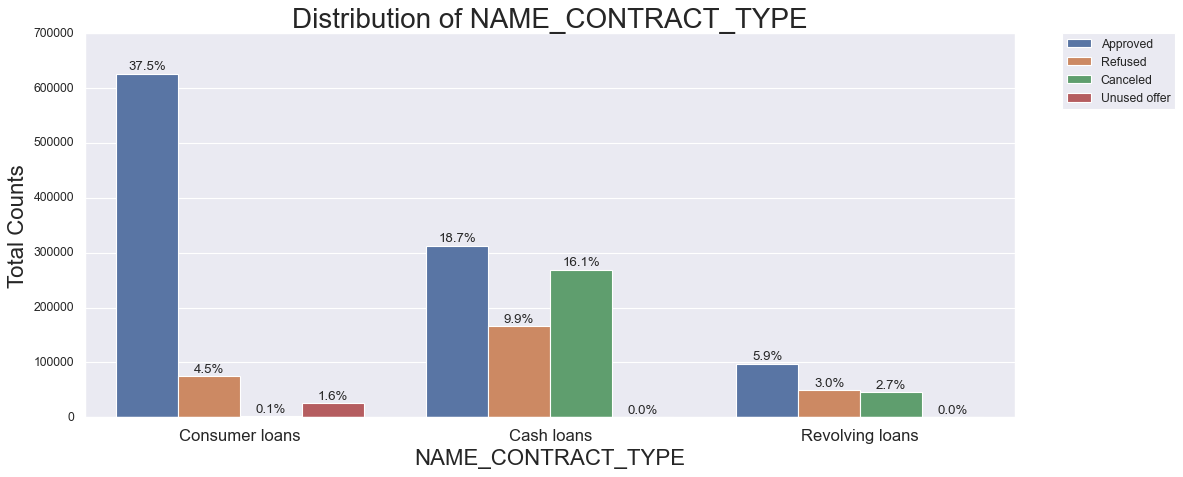

In [136]:
countplot_on_prev('NAME_CONTRACT_TYPE')

**Observations from above plot:**
* From the above chart, we observe that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

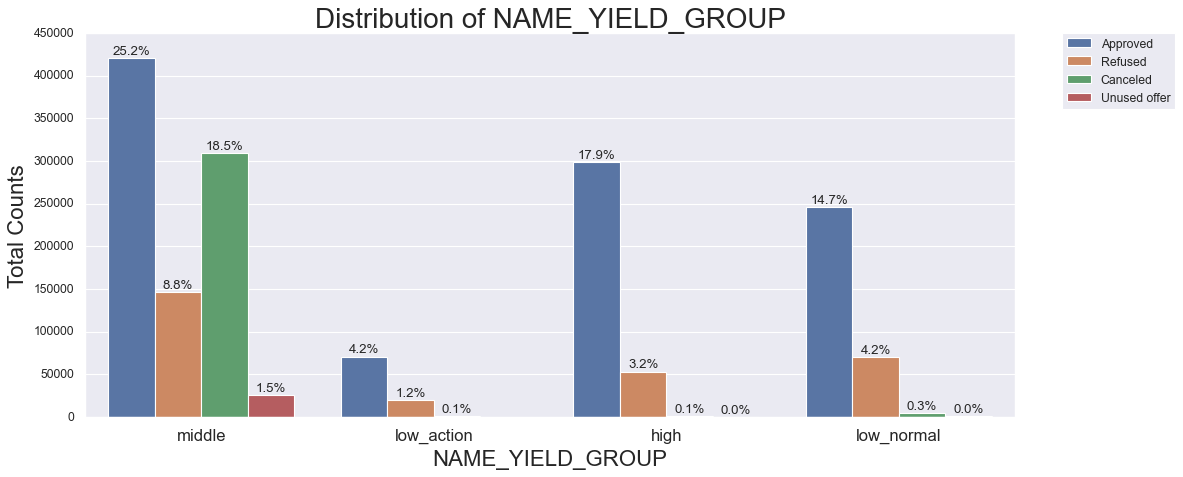

In [137]:
countplot_on_prev('NAME_YIELD_GROUP')

**Observations from above plot:**
* From the above chart, we observe that, most of the applications are from Middle class family and Low_normal family. Although the Middle class's loans are refused more often than others.

## 9. Bivariate Analysis for Numeric Variables in prev_appl01.

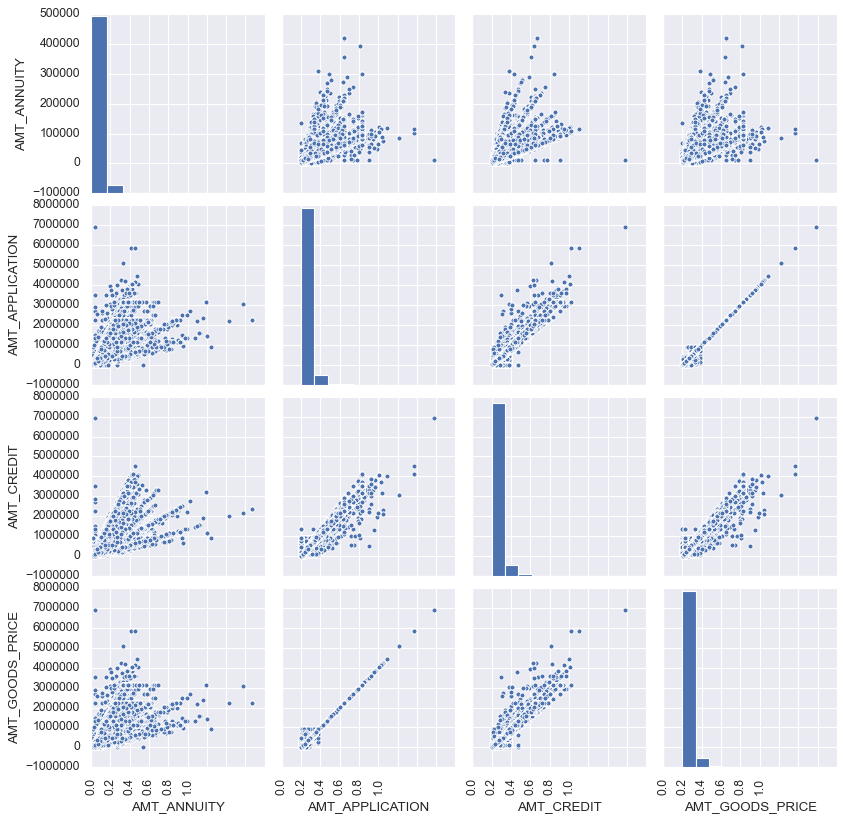

In [138]:
temp = prev_appl01[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']]        
p = sns.pairplot(temp)
for ax in p.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

**Observation from the graph:**
* Annuity of previous application has a very high and positive influence over 'AMT_APPLICATION', 'AMT_CREDIT' and 'AMT_GOODS_PRICE'(increase in Annuity increases the above mentioned values).
* For how much credit did customer ask on the previous application is highly influenced by the Goods price of good that customer has asked for on the previous application.

## 9. Merging prev_appl01 and new_appl01 for further Analysis.

In [139]:
# Merging the two datasets using 'pd.merge'.
merged_appl = pd.merge(new_appl01, prev_appl01, how = 'right', on = ['SK_ID_CURR'])
merged_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0           Cash loans           M            N   
1      100003     0.0           Cash loans           F            N   
2      100003     0.0           Cash loans           F            N   
3      100003     0.0           Cash loans           F            N   
4      100004     0.0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y           0.0             202.0         406.0   
1               N           0.0             270.0        1293.0   
2               N           0.0             270.0        1293.0   
3               N           0.0             270.0        1293.0   
4               Y           0.0              67.0         135.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_INCOME_TYPE  \
0           24.0              351.0          Working   
1           35.0             1129.0    State servant   
2           35.0             1129.0    State servant   
3           35.0             1129.0    State servant   
4            6.0              135.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801      9461.0          637.0             3648.0   
1                    0.003541     16765.0         1188.0             1186.0   
2                    0.003541     16765.0         1188.0             1186.0   
3                    0.003541     16765.0         1188.0             1186.0   
4                    0.010032     19046.0          225.0             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  \
0           2120.0        Laborers              1.0  Business Entity Type 3   
1            291.0      Core staff              2.0                  School   
2            291.0      Core staff              2.0                  School   
3            291.0      Core staff              2.0                  School   
4           2531.0        Laborers              1.0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.500341                       1.0   
2      0.622246      0.500341                       1.0   
3      0.622246      0.500341                       1.0   
4      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   828.0   
3                       0.0                   828.0   
4                       0.0                   815.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AM

In [140]:
# Checking the Dimension of the Merged Data.
print('Dimension of Merged Data:', merged_appl.shape)

Dimension of Merged Data: (1670214, 64)


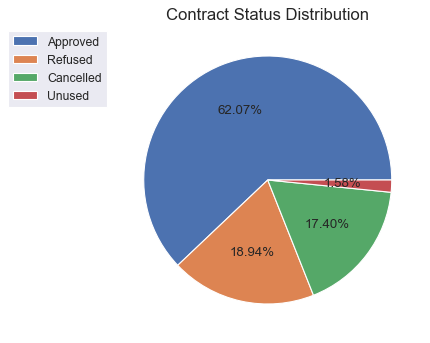

In [141]:
x = ['Approved', 'Refused', 'Cancelled', 'Unused']
y = merged_appl['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
t = 'Contract Status Distribution'
pie_plot(x,y,t)

In [142]:
# Splitting the dataframes into two.
Target_0 = merged_appl[merged_appl.TARGET == 0]
Target_1 = merged_appl[merged_appl.TARGET == 1]

In [143]:
def Analysis_using_countplot(i,R):
    
    plt.figure(figsize = (20,6))
    
    plt.subplot(1,2,1)
    sns.set_style('darkgrid')
    t_0 = sns.countplot(i, data = Target_0)
    plt.title('Non-Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    for p in t_0.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        t_0.annotate('{:.1f}%'.format(100*y/len(merged_appl)), (x.mean(), y), ha='center', va='bottom')
    
    plt.subplot(1,2,2)
    sns.set_style('darkgrid')
    t_1 = sns.countplot(i, data = Target_1)
    plt.title('Defaulters {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Defaulters', fontsize = 15)
    
    for p in t_1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        t_1.annotate('{:.1f}%'.format(100*y/len(merged_appl)), (x.mean(), y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

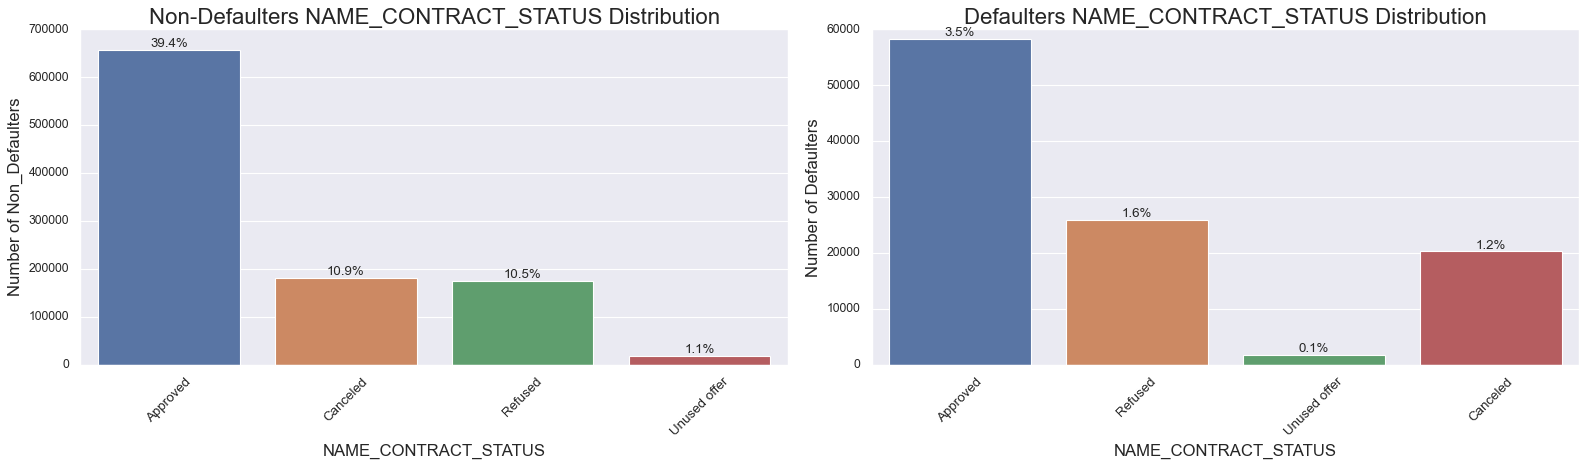

In [144]:
Analysis_using_countplot('NAME_CONTRACT_STATUS',45)

**Observation from the above plot:**
* 3.5% of the total customer’s loans were Approved even though they were Defaulters.
* Around 10% of the loans were Refused for Non-Defaulted customers.
* About only 1% of the loans were Refused for the Defaulted customers.

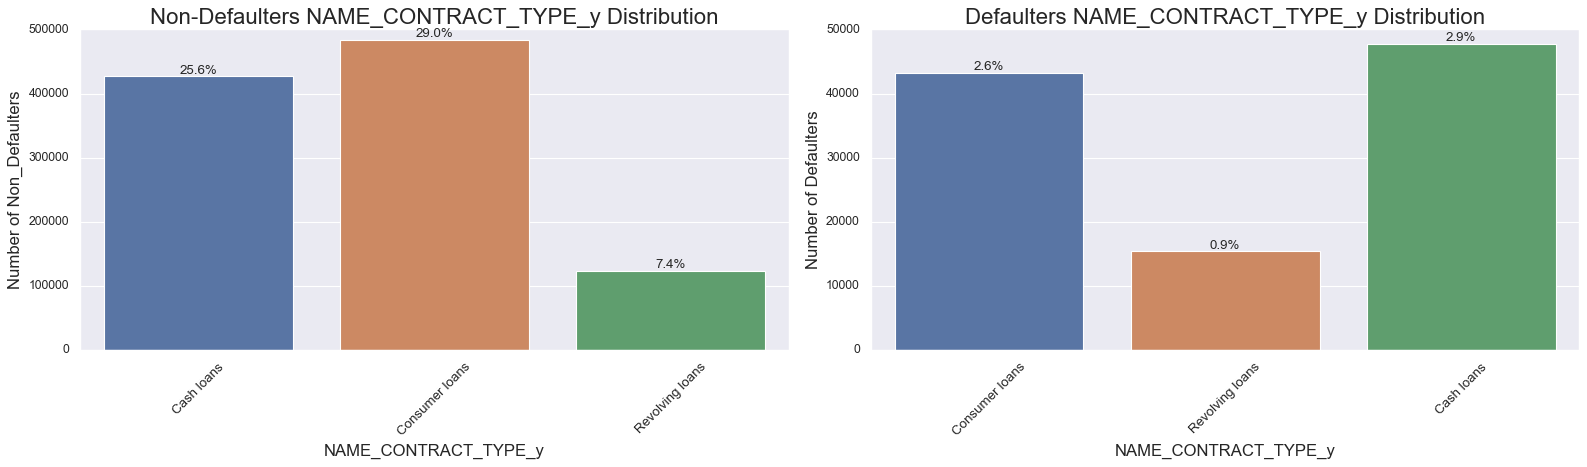

In [145]:
Analysis_using_countplot('NAME_CONTRACT_TYPE_y',45)

**Observation from the above plot:**
* It seems that for defaulters more of the previous applications were for Cash Loans.
* For non-defaulters the percentage of Cash loans and Consumer loans have a very slight difference, Consumer loans being the max.

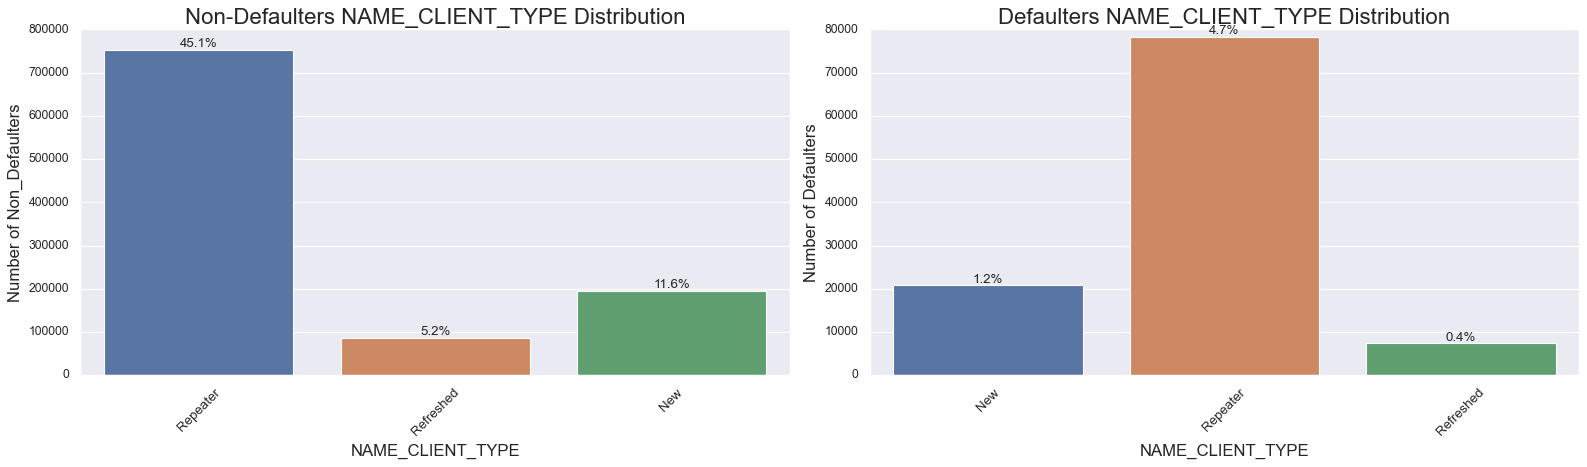

In [146]:
Analysis_using_countplot('NAME_CLIENT_TYPE',45)

**Observation from the above plot:**
* As we can observe that, there are around 49% of the Repeater customers.
* Only around 4% of the Repeater customers are Defaulters.
* And about 12% of the new customers are defaulters.

In [147]:
def bar_merged(x,y):
    t = pd.pivot_table(merged_appl, values='TARGET', index=[x],columns=[y], aggfunc=np.mean)
    plt.figure(figsize = [15,10])
    merged = t.plot(kind = 'bar')
    plt.title('Defaulers in  {} and {}'.format(x,y), fontsize = 20)
    plt.xlabel(x)
    plt.xticks(rotation = 45)
    plt.ylabel('Defaulters')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.show()

<Figure size 1200x800 with 0 Axes>

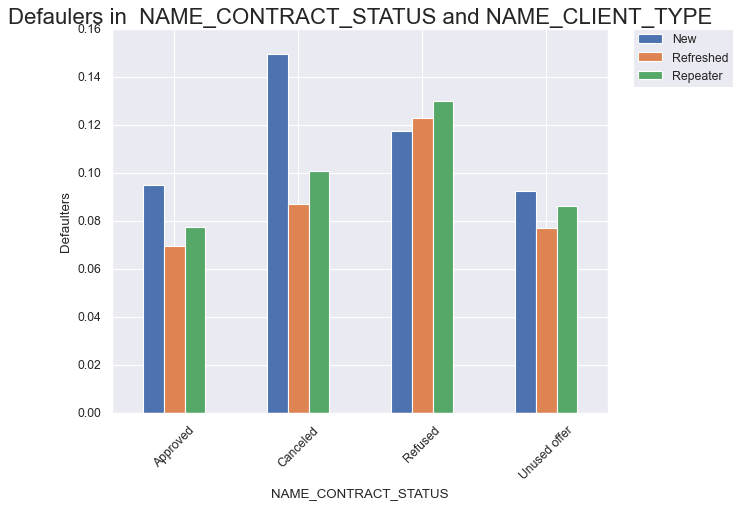

In [148]:
x = 'NAME_CONTRACT_STATUS'
y = 'NAME_CLIENT_TYPE'
bar_merged(x,y)

**Observations from above graph:**
* We can observe that 'New' customers have there previous loan applications cancelled the most, as they tend to be defaulters.
* We observe a very high peak in all the Contract Status in Refused column.
* Repeaters have got there loan application refused the most.

<Figure size 1200x800 with 0 Axes>

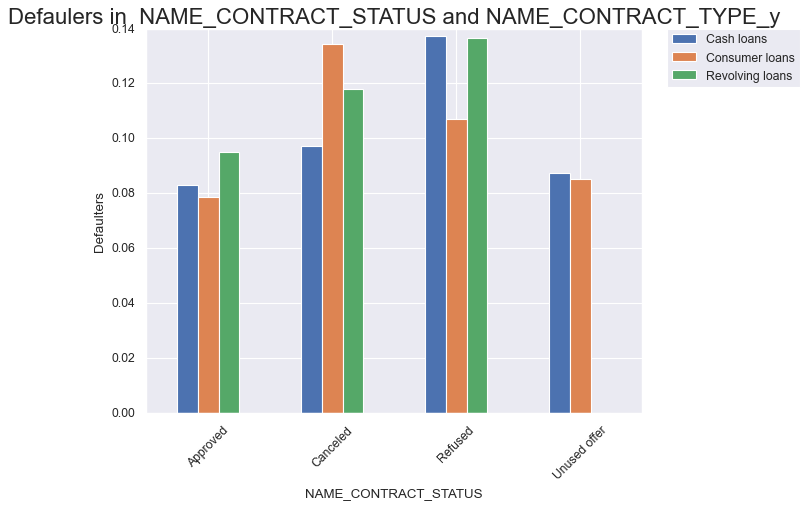

In [149]:
x = 'NAME_CONTRACT_STATUS'
y = 'NAME_CONTRACT_TYPE_y'
bar_merged(x,y)

**Observations from above graph:**
* In the 'Refused' column we can observe a peak on 'Cash loans' and 'Revolving loans'.
* Consumer loans were cancelled the most by the customers in the previous application.
* Most of the defaulters were refused for the loan in the preious application.

<Figure size 1200x800 with 0 Axes>

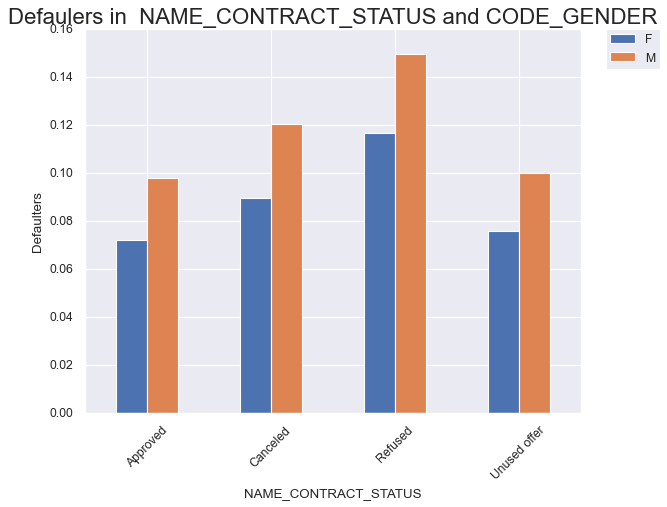

In [150]:
x = 'NAME_CONTRACT_STATUS'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observations from above graph:**
*  We observe that Females have applied more % of loans than that of Males. And have got approved even though they being a defaulter  chances are high.
* We can observe that most of the defaulters were refused in the previous application.

<Figure size 1200x800 with 0 Axes>

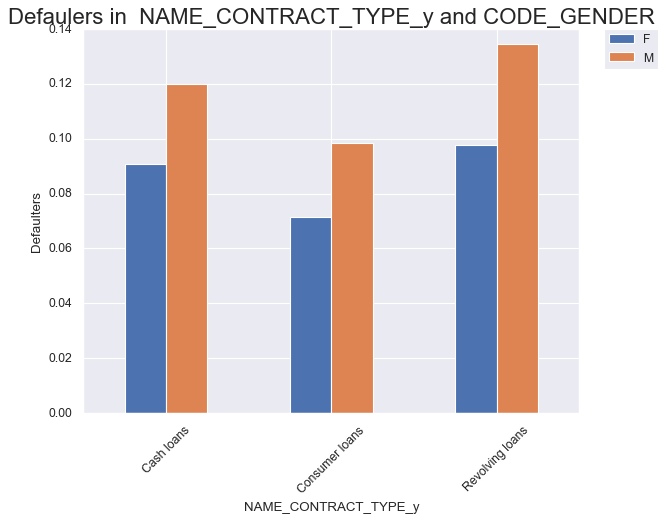

In [151]:
x = 'NAME_CONTRACT_TYPE_y'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observations from above graph:**
* We observe that male customers are more likely to be defaulters.
* The most number of defaulters have applied for the revolving loans, with males having highest peak.

<Figure size 1200x800 with 0 Axes>

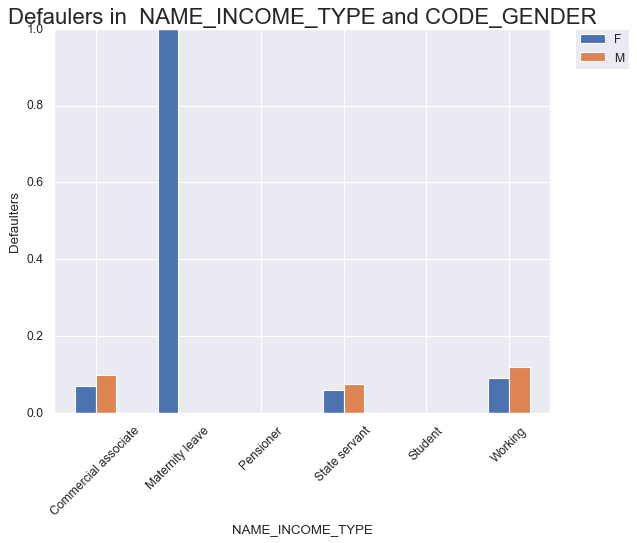

In [152]:
x = 'NAME_INCOME_TYPE'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observations from above graph:**
* We observe that Female customers in maternity leave have highest peak being a defaulter.

<Figure size 1200x800 with 0 Axes>

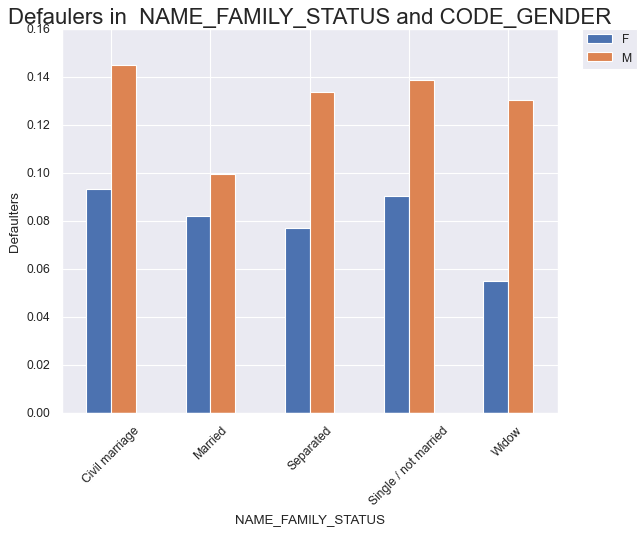

In [153]:
x = 'NAME_FAMILY_STATUS'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observations from above graph:**
* We observe that Males with Civil Marriage have the highest peak being a defaulter.

<Figure size 1200x800 with 0 Axes>

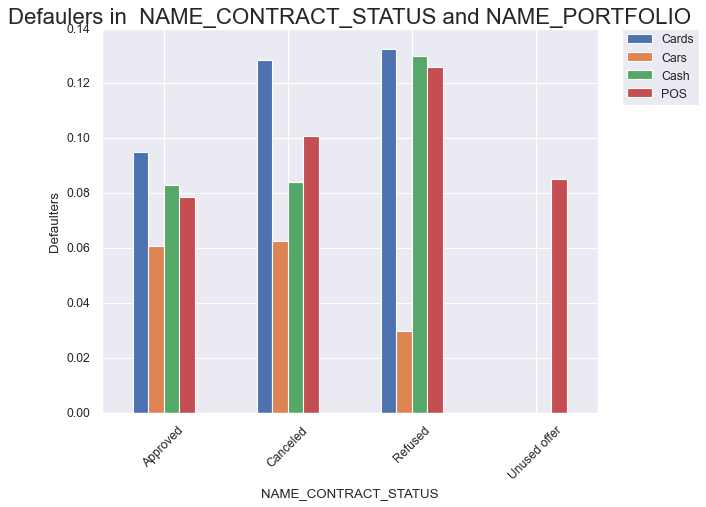

In [154]:
x = 'NAME_CONTRACT_STATUS'
y = 'NAME_PORTFOLIO'
bar_merged(x,y)

**Observations from above graph:**
* We see a high Default % in the 'Approved' column in all of the Portfolios.
* There is a high Refused rate in Cards, Cash and POS, which is a good thing.

<Figure size 1200x800 with 0 Axes>

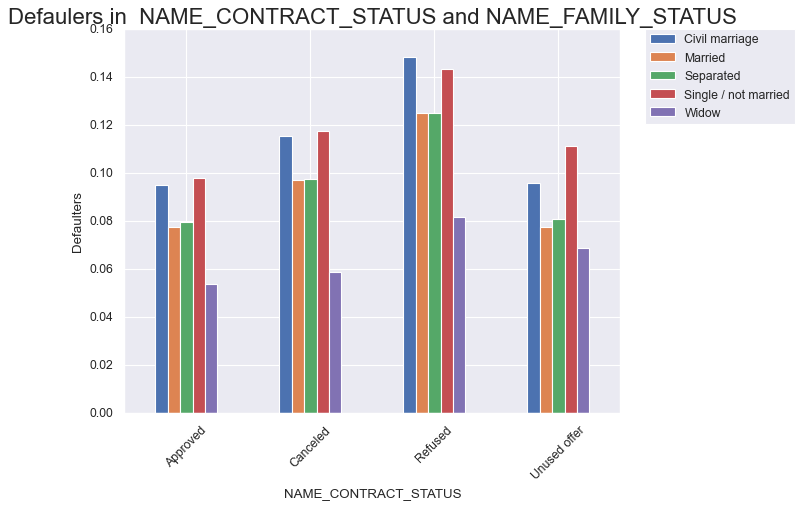

In [155]:
x = 'NAME_CONTRACT_STATUS'
y = 'NAME_FAMILY_STATUS'
bar_merged(x,y)

**Observations from above graph:**
* We observe that the most % of defaulters are from 'Civil Marriage', followed by 'Single/Not Married'.
* Widows are less likely to be defaulters.

<Figure size 1200x800 with 0 Axes>

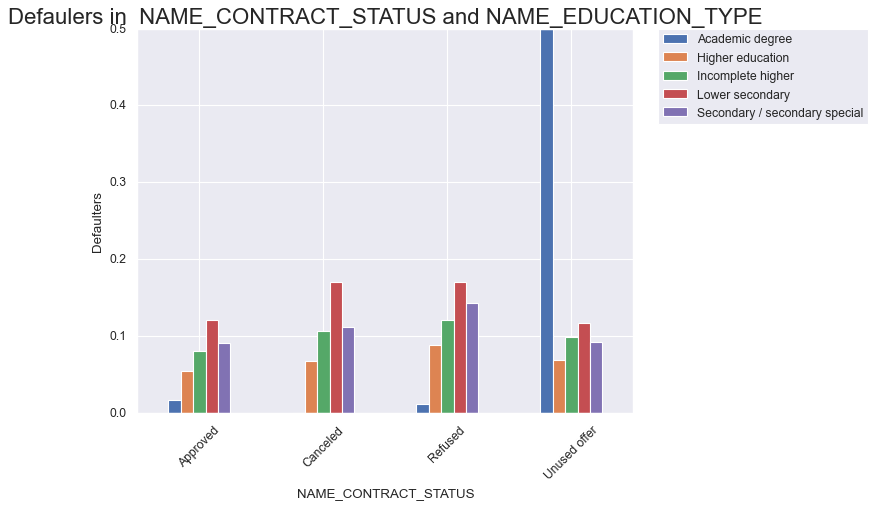

In [156]:
x = 'NAME_CONTRACT_STATUS'
y = 'NAME_EDUCATION_TYPE'
bar_merged(x,y)

**Observations from above graph:**
* We observe that the most % of defaulters belong to 'Lower Secondary' and 'Secondary/Secondary Special' education type.
* We also observe that 'Academic Degree' have the lowest % of defaulters present.

<Figure size 1200x800 with 0 Axes>

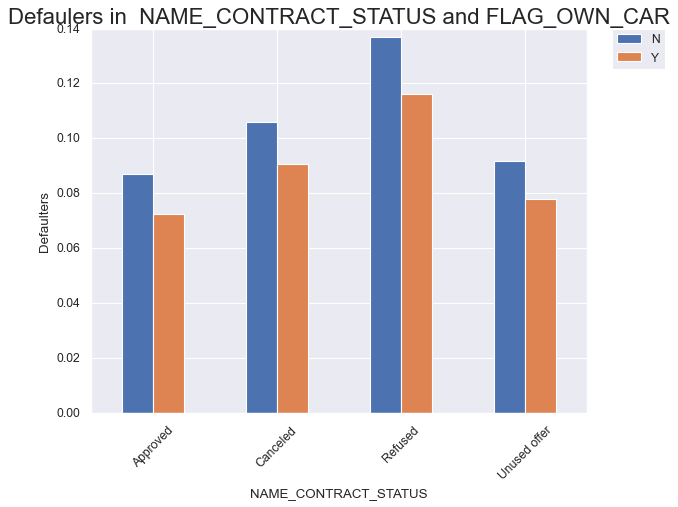

In [157]:
x = 'NAME_CONTRACT_STATUS'
y = 'FLAG_OWN_CAR'
bar_merged(x,y)

**Observations from above graph:**
* We observe that the most % of defaulters doesn't own car.

<Figure size 1200x800 with 0 Axes>

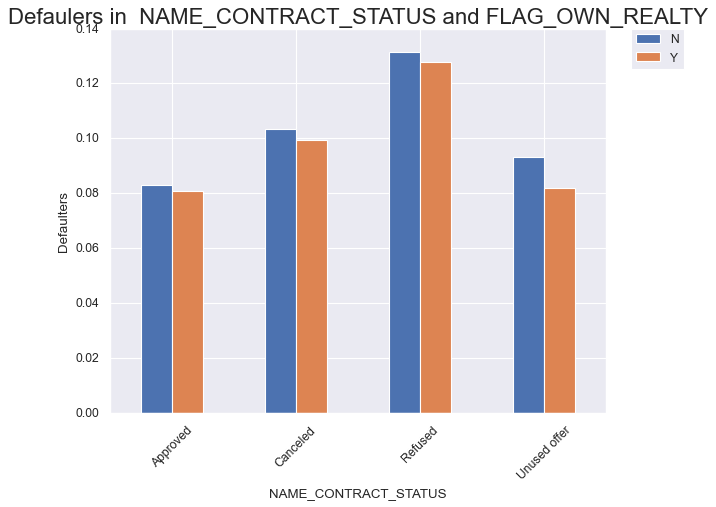

In [158]:
x = 'NAME_CONTRACT_STATUS'
y = 'FLAG_OWN_REALTY'
bar_merged(x,y)

**Observations from above graph:**
* We observe that the most % of defaulters doesn't own realty.

<Figure size 1200x800 with 0 Axes>

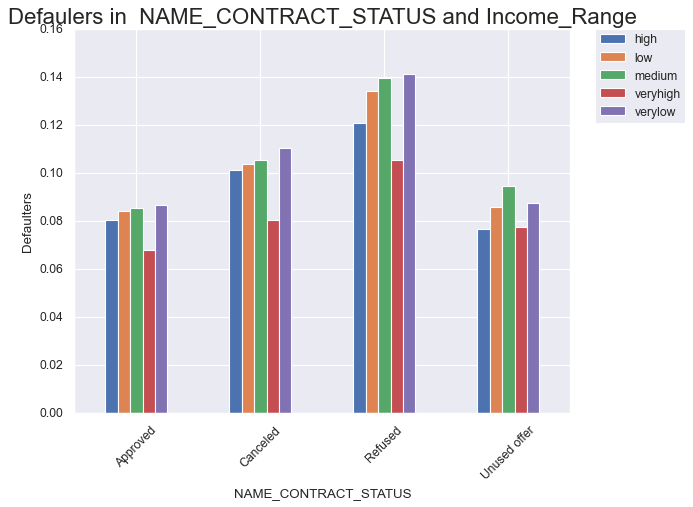

In [159]:
x = 'NAME_CONTRACT_STATUS'
y = 'Income_Range'
bar_merged(x,y)

**Observation from the aove plot:**
* We observe that people have Very-low Income, have the maximum percentage of defaulters, followed by Medium Income and Low Income.
* We can observe a high refuse rate for all the Income ranges.

<Figure size 1200x800 with 0 Axes>

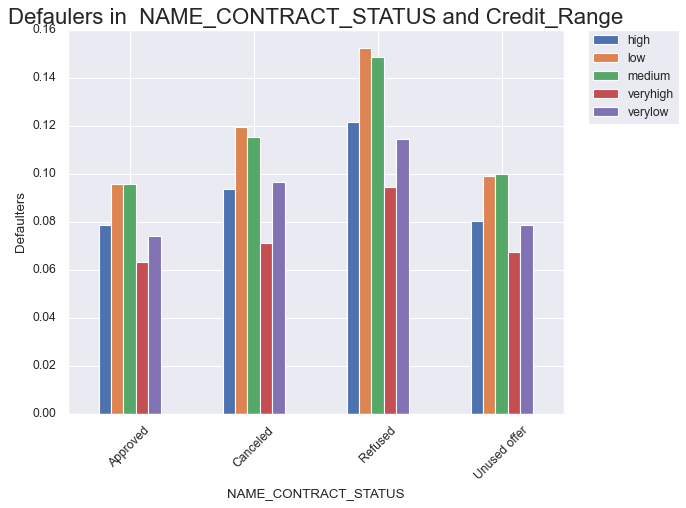

In [160]:
x = 'NAME_CONTRACT_STATUS'
y = 'Credit_Range'
bar_merged(x,y)

**Observation from the aove plot:**
* We see a high Default percentage for the Low Credit, followed by Medium and High Credit.
* We can observe a high refuse rate for all the Credit ranges.


<Figure size 1200x800 with 0 Axes>

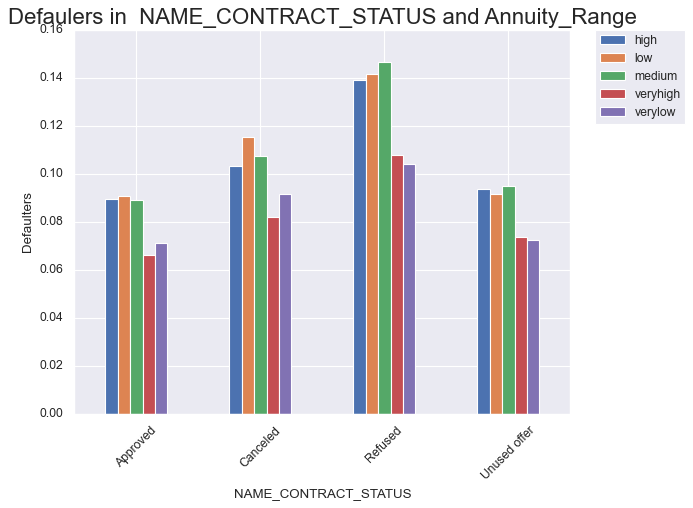

In [161]:
x = 'NAME_CONTRACT_STATUS'
y = 'Annuity_Range'
bar_merged(x,y)

**Observation from the aove plot:**
* We observe that customers having Medium Annuity, have the maximum percentage of defaulters, followed by Low and High.
* We can observe a high refuse rate for all the Annuity ranges.

<Figure size 1200x800 with 0 Axes>

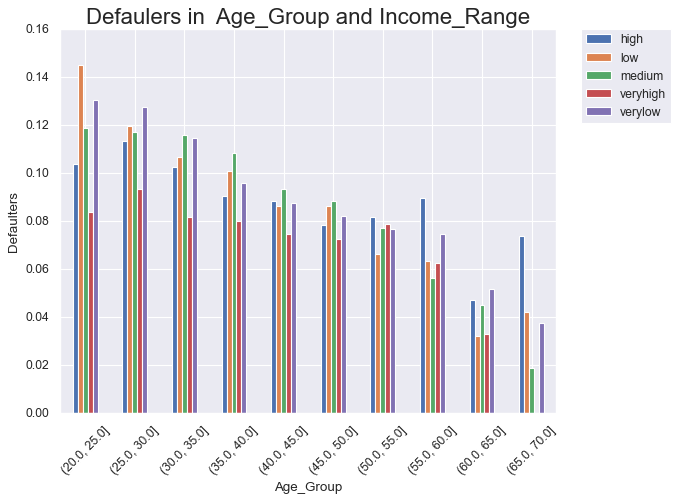

In [162]:
x = 'Age_Group'
y = 'Income_Range'
bar_merged(x,y)

**Observation from the aove plot:**
* Customers aging between 20 and 30 years have the maximum percentage of Defaulters when compared to other Age groups.
* Customers aging between 55 and 70 years have the minimum percentage of Defaulters when compared to other Age groups.
* Customers above the age of 55 years with very high Income are less likely to Default.

<Figure size 1200x800 with 0 Axes>

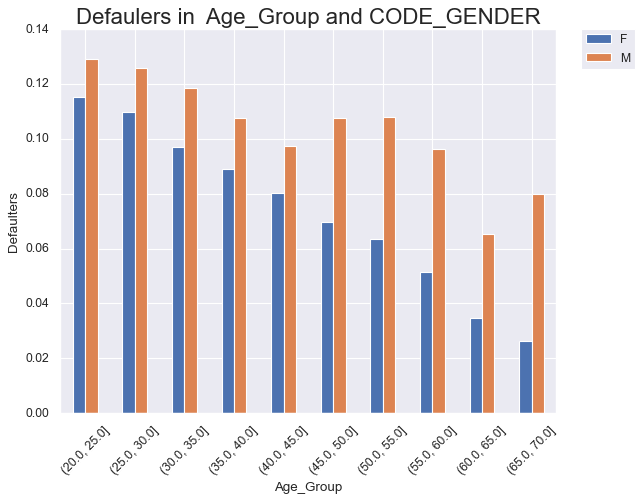

In [163]:
x = 'Age_Group'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observation from the aove plot:**
* Male customers throughout the Age-group have consistently tend to be Defaulters.
* We can observe that as the age of the Female customer increases the less likely they tend to be Defaulters.

<Figure size 1200x800 with 0 Axes>

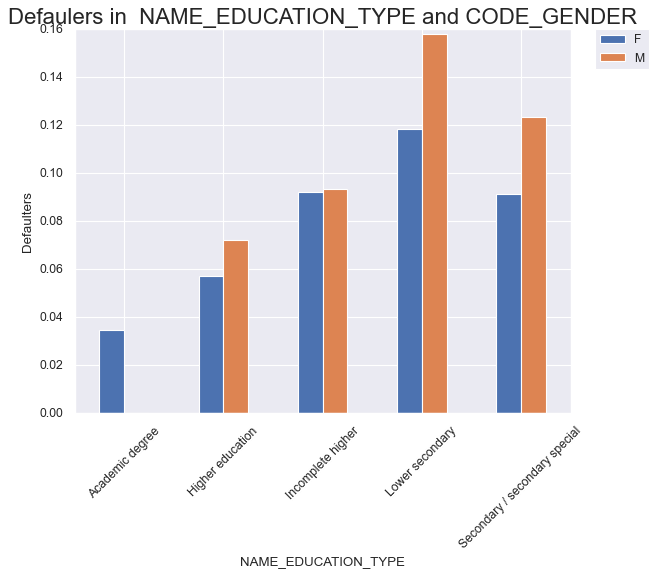

In [164]:
x = 'NAME_EDUCATION_TYPE'
y = 'CODE_GENDER'
bar_merged(x,y)

**Observation from the aove plot:**
* Male customers are more educated than that of the Female customers, also male customers tend to be defaulters.
* Most of the customers have Lower Secondary education level and also the Default percentage for Lower secondary is the highest.


## 10. Conclusion.

* Bank should give out more Revolving loans, as the customers with revolving loans are less likely to Default.
* Most of the Consumer loans are approved by the banks, but there’s a majority of customers who are either cancelling the loan application or it is left Unused.
* Females are less likely to Default than that of Males.
* The education level of a customer is a good indicator of their ability to pay back.  Higher education level customers are more reliable than others.
* A customer's age is also an important factor. Although Older customers are less likely to default, that does not mean that Young customers should be excluded; they must be educated on the entire loan cycle and the consequences of defaulting.
* Single customers and Civil Married customers are more likely to Default, so either their loans should be refused or approve the loan for a higher interest rate.
* Customers with higher incomes are less likely to Default.
* Customers with higher work experience are less likely to Default.